In [3]:
# 데이터 분석 패키지
import numpy as np
import pandas as pd

In [4]:
# 모든 컬럼을 출력하도록 설정
pd.set_option('display.max_columns', None)  # None으로 설정하면 모든 컬럼 출력
# 모든 행을 출력하도록 설정
pd.set_option('display.max_rows', 30)  # None으로 설정하면 모든 행 출력

In [5]:
# 시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# matplotlib 한글지원 패키지
import koreanize_matplotlib

In [7]:
# 날짜는 파이썬 표준라이브러리 datetime 사용
import datetime
# 오늘 날짜 구하기
today = datetime.datetime.today()
today = today.strftime('%Y-%m-%d')
today = '2024-12-19'

In [8]:
df_etfs = pd.read_csv(f'new_etf_{today}.csv')

In [9]:
df_etfs.shape

(930, 17)

In [10]:
df_etfs.head(1)

,Symbol,Category,CategoryName,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap,Brand,인버스,레버리지,헤지
0,459580,6,채권,KODEX CD금리액티브(합성),1057560,2,300,0.03,1057346.0,0.8398,289552,306219,95099,KODEX,False,False,False


#### 수치형 변수로 히스토그램 그리기

In [11]:
df_num_vars = df_etfs.select_dtypes(np.number).drop(['Category','RiseFall'],axis=1)
df_num_vars

,Price,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap
0,1057560,300,0.03,1057346.0,0.8398,289552,306219,95099
1,55425,15,0.03,55424.0,0.8187,218161,12090,68508
2,21195,-465,-2.15,21193.0,17.1444,4928789,104522,64136
3,32330,-750,-2.27,32414.0,-3.7589,3830187,123991,55462
4,108975,15,0.01,108965.0,0.8328,44974,4900,43609
...,...,...,...,...,...,...,...,...
925,5260,-30,-0.57,5254.0,-7.8398,60,0,16
926,1951,-144,-6.87,1948.0,-1.1793,47674,93,16
927,6445,-60,-0.92,6453.0,-3.7010,126,0,15
928,16440,-390,-2.32,16424.0,29.4117,23,0,10


In [12]:
df_num_vars.columns

Index(['Price', 'Change', 'ChangeRate', 'NAV', 'EarningRate', 'Volume',
       'Amount', 'MarCap'],
      dtype='object')

In [13]:
num_cols = df_num_vars.columns.tolist()
num_cols

['Price',
 'Change',
 'ChangeRate',
 'NAV',
 'EarningRate',
 'Volume',
 'Amount',
 'MarCap']

<Axes: ylabel='Frequency'>

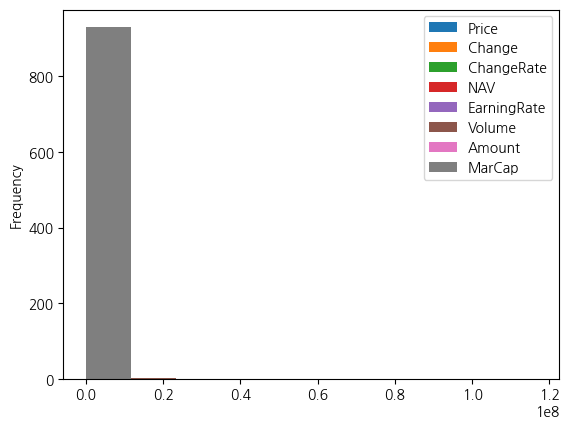

In [14]:
df_num_vars[num_cols].plot(kind='hist')

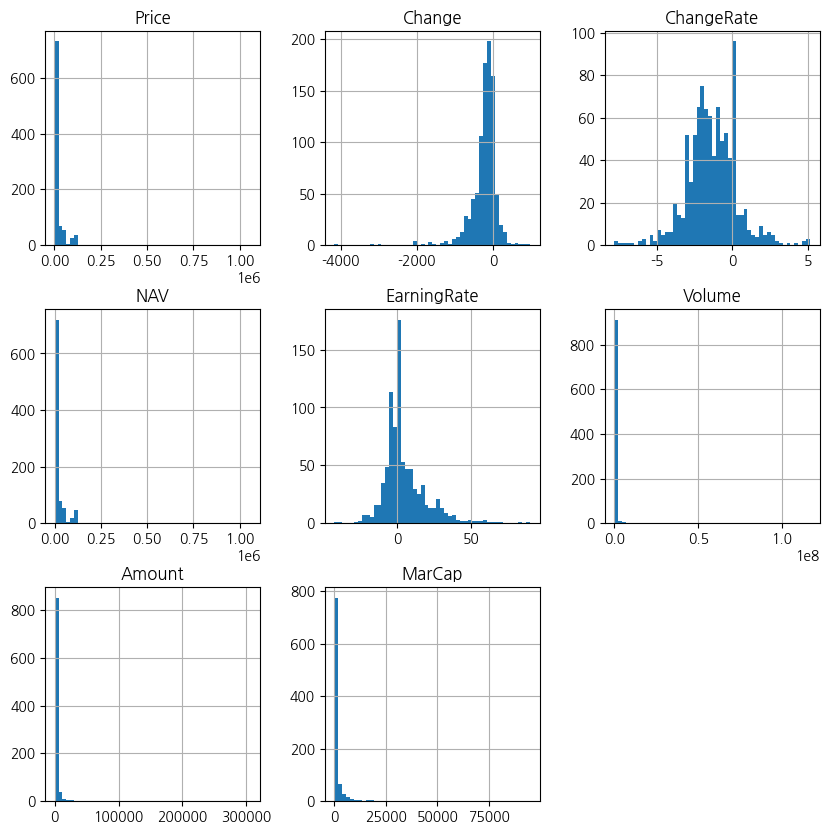

In [15]:
df_num_vars[num_cols].hist(figsize=(10,10),bins=50)
plt.show()

#### 데이터 프레임에서 지원하는 matplolib의 플로팅
- 범주형 + 수치형
  - 'line' : line plot (default)
  - 'bar' : vertical bar plot
  - 'barh' : horizontal bar plot
  - 'box' : boxplot
  - 'area' : area plot
  - 'pie' : pie plot
  
- 수치형변수
  - 'hist' : histogram
  - 'kde' : Kernel Density Estimation plot
  - 'density' : same as 'kde'- 
  
  
- 수치형변수 + 수치형변수
  - 'scatter' : scatter plot (DataFrame only)
  - 'hexbin' : hexbin plot (DataFrame only)

In [16]:
def findAttr( module, txt ) :
  import re
  data_list = dir(module)
  pattern = re.compile(rf'{txt}')

  matches = [item for item in data_list if pattern.search(item)]
  return matches
 
findAttr(df_num_vars[num_cols],'hist')

['hist']

<Axes: xlabel='MarCap', ylabel='Count'>

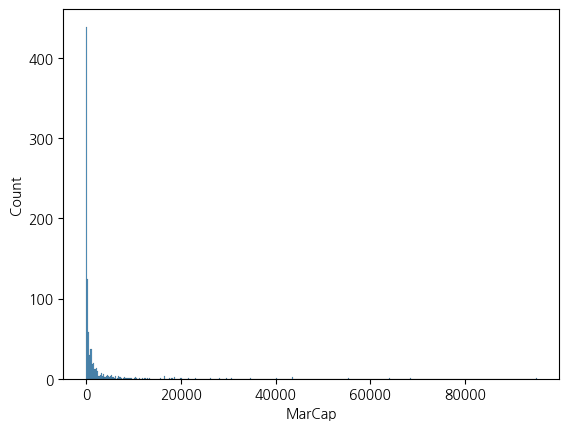

In [17]:
sns.histplot(data=df_etfs, x='MarCap')

In [18]:
tmp = pd.melt(df_num_vars)
tmp

,variable,value
0,Price,1057560.0
1,Price,55425.0
2,Price,21195.0
3,Price,32330.0
4,Price,108975.0
...,...,...
7435,MarCap,16.0
7436,MarCap,16.0
7437,MarCap,15.0
7438,MarCap,10.0


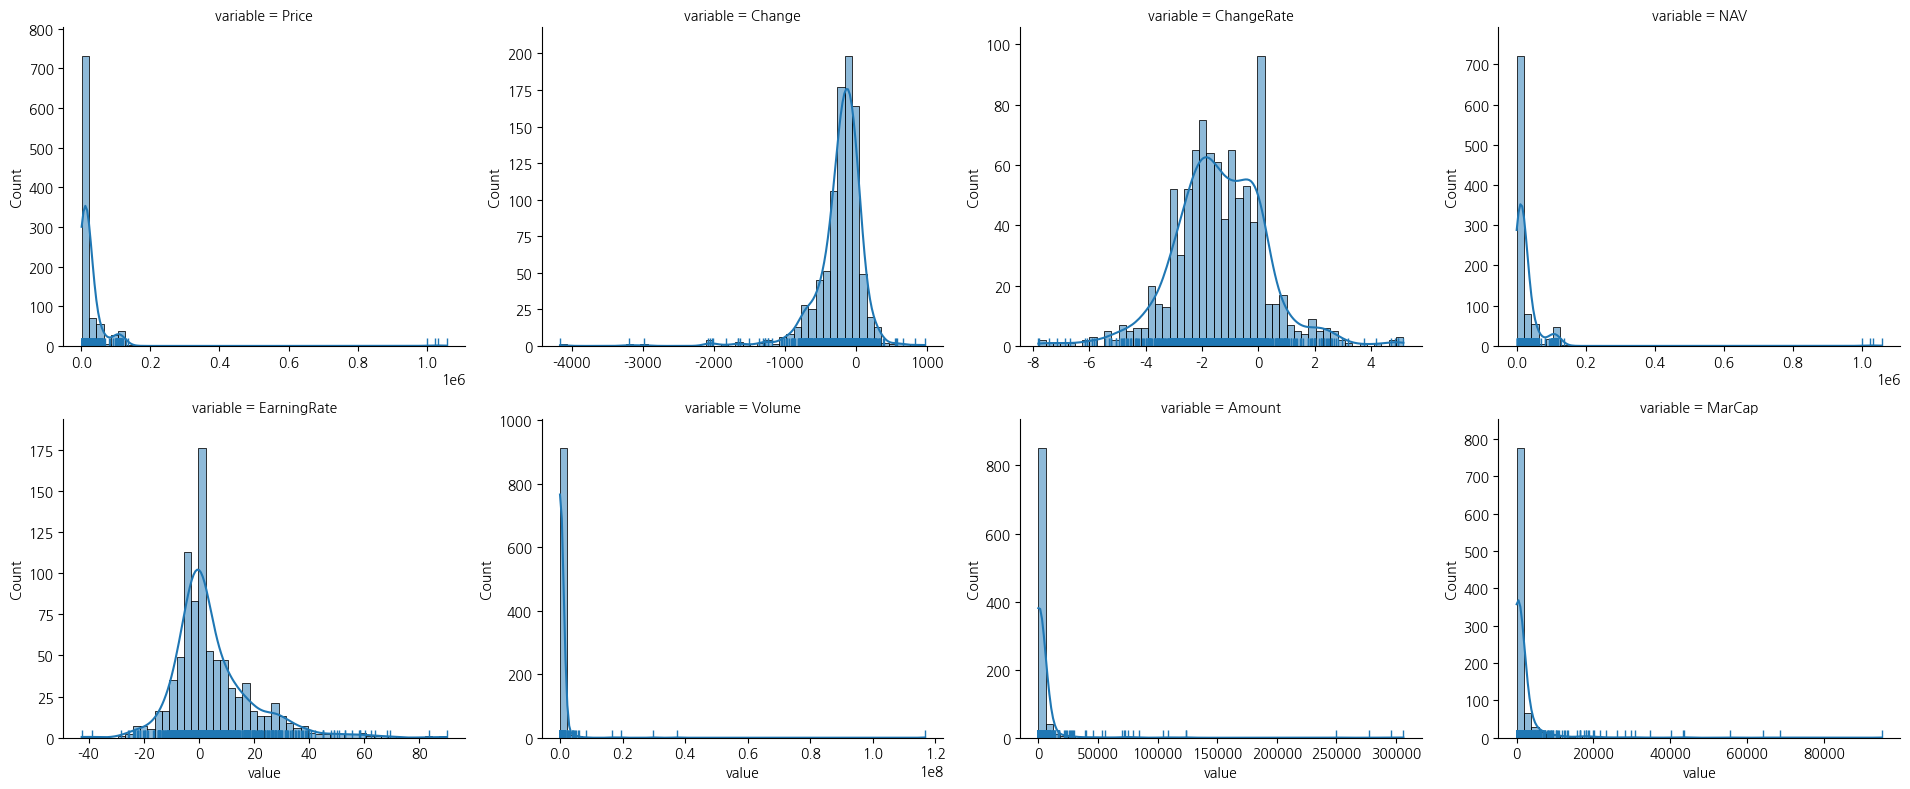

In [19]:
g = sns.FacetGrid(data=tmp ,col='variable', col_wrap=4, height=4, aspect=1.2, sharex=False, sharey=False, palette='Blues_r')
g.map(sns.histplot,'value',bins=50, kde=True)
g.map(sns.rugplot,'value')


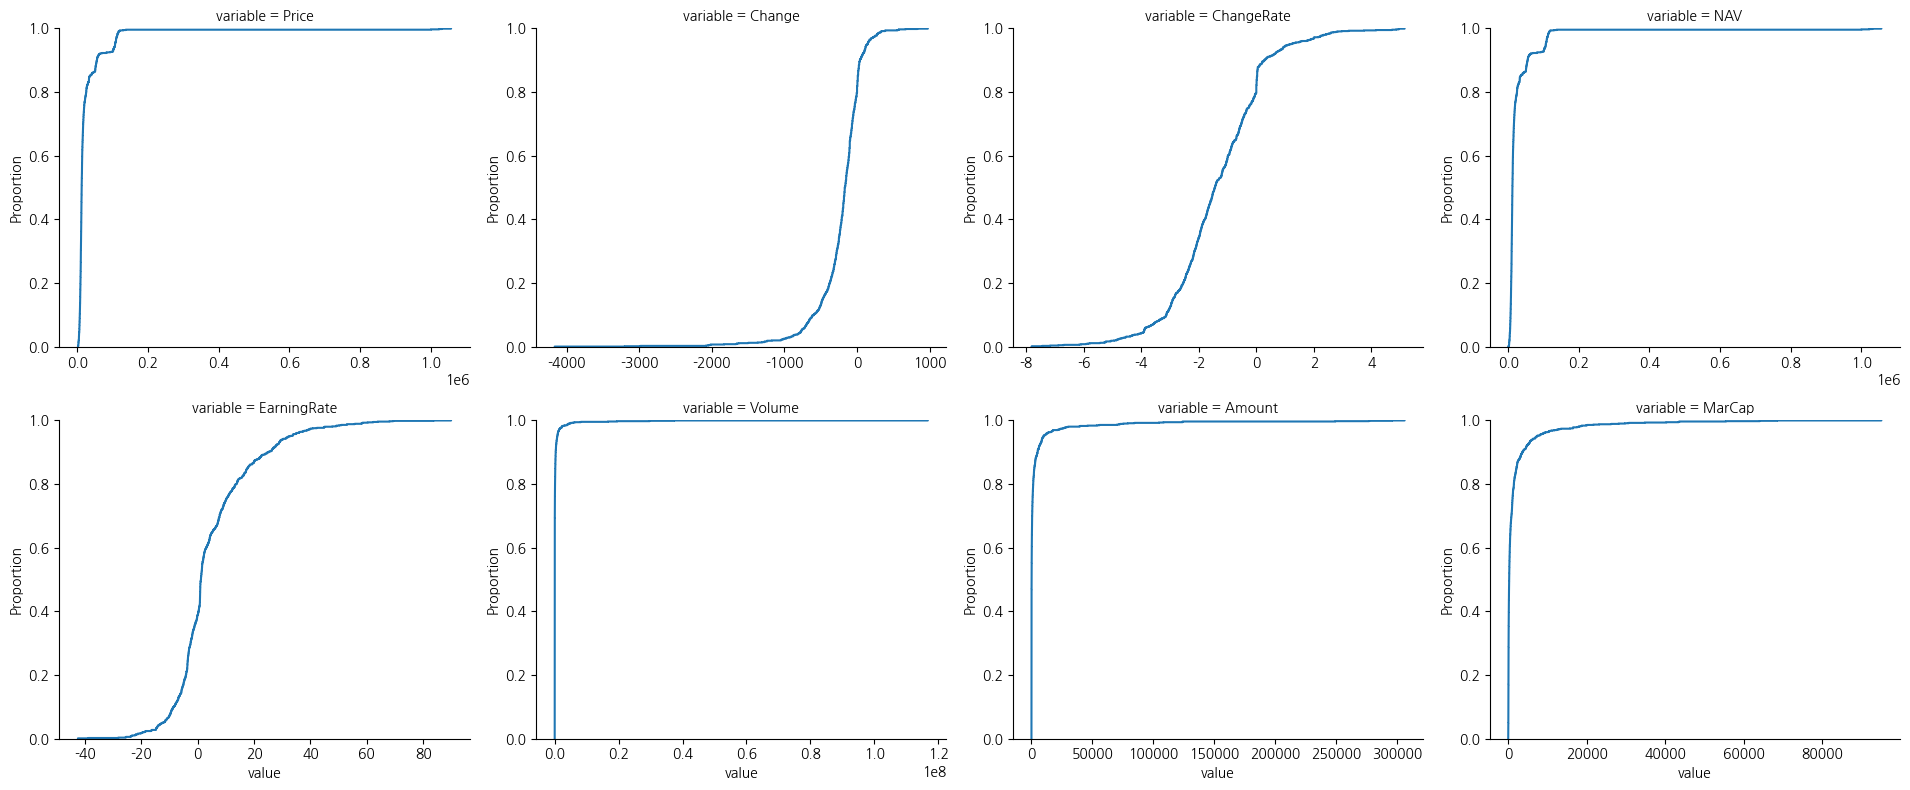

In [20]:
g = sns.FacetGrid(data=tmp ,col='variable', col_wrap=4, height=4, aspect=1.2, sharex=False, sharey=False, palette='Blues_r')
g.map(sns.ecdfplot,'value')

#### 표준화 VS 정규화
- 다른 스케일의 값을 조정할 때 표준화 혹은 정규화 방법을 사용
- 표준화(standardization) :
  - 데이터가 평균으로 부터 얼마나 떨어져 있는지 나타내는 값으로 변환
  - (Z-score 표준화) : (측정값 - 평균) / 표준편차
- 정규화(normalization) :
  - 데이터의 상대적 크기에 대한 영향을 줄이기 위해 0~1로 변환
  - (측정값 - 최소값) / (최대값 - 최소값)

In [21]:
num_cols

['Price',
 'Change',
 'ChangeRate',
 'NAV',
 'EarningRate',
 'Volume',
 'Amount',
 'MarCap']

In [22]:
# 수치형 변수의 스케일 조정 파생열 추가
for col in num_cols:
  df_etfs[f'{col}_z_score'] = (df_etfs[col]-df_etfs[col].mean()) / df_etfs[col].std()
  df_etfs[f'{col}_norm'] = (df_etfs[col] - df_etfs[col].min()) / (df_etfs[col].max() - df_etfs[col].min())


In [23]:
df_etfs.head(1)

,Symbol,Category,CategoryName,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap,Brand,인버스,레버리지,헤지,Price_z_score,Price_norm,Change_z_score,Change_norm,ChangeRate_z_score,ChangeRate_norm,NAV_z_score,NAV_norm,EarningRate_z_score,EarningRate_norm,Volume_z_score,Volume_norm,Amount_z_score,Amount_norm,MarCap_z_score,MarCap_norm
0,459580,6,채권,KODEX CD금리액티브(합성),1057560,2,300,0.03,1057346.0,0.8398,289552,306219,95099,KODEX,False,False,False,14.476592,1.0,1.454085,0.868677,0.84622,0.604938,14.474714,1.0,-0.28037,0.327316,-0.0253,0.00248,14.230339,1.0,14.883359,1.0


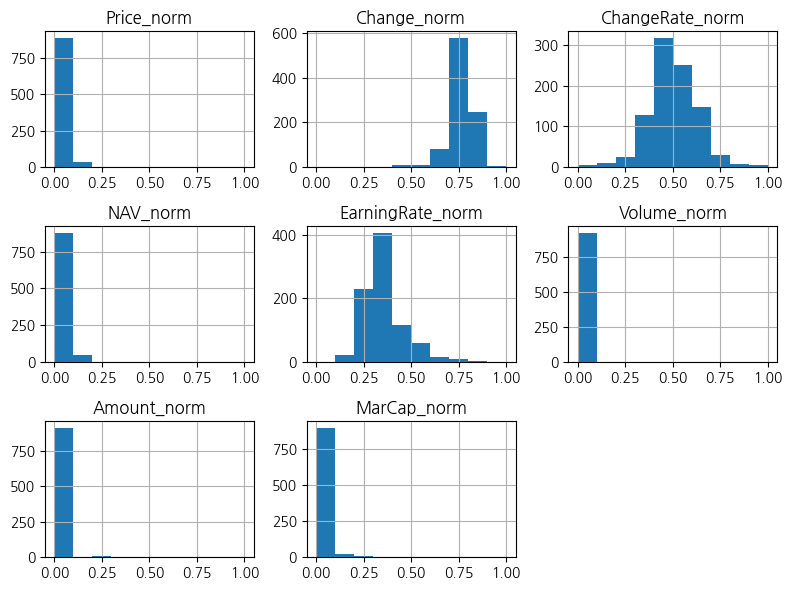

In [24]:
df_etfs.filter(regex=f'(_norm)$',axis=1).hist(figsize=(8,6))
plt.tight_layout()
plt.show()


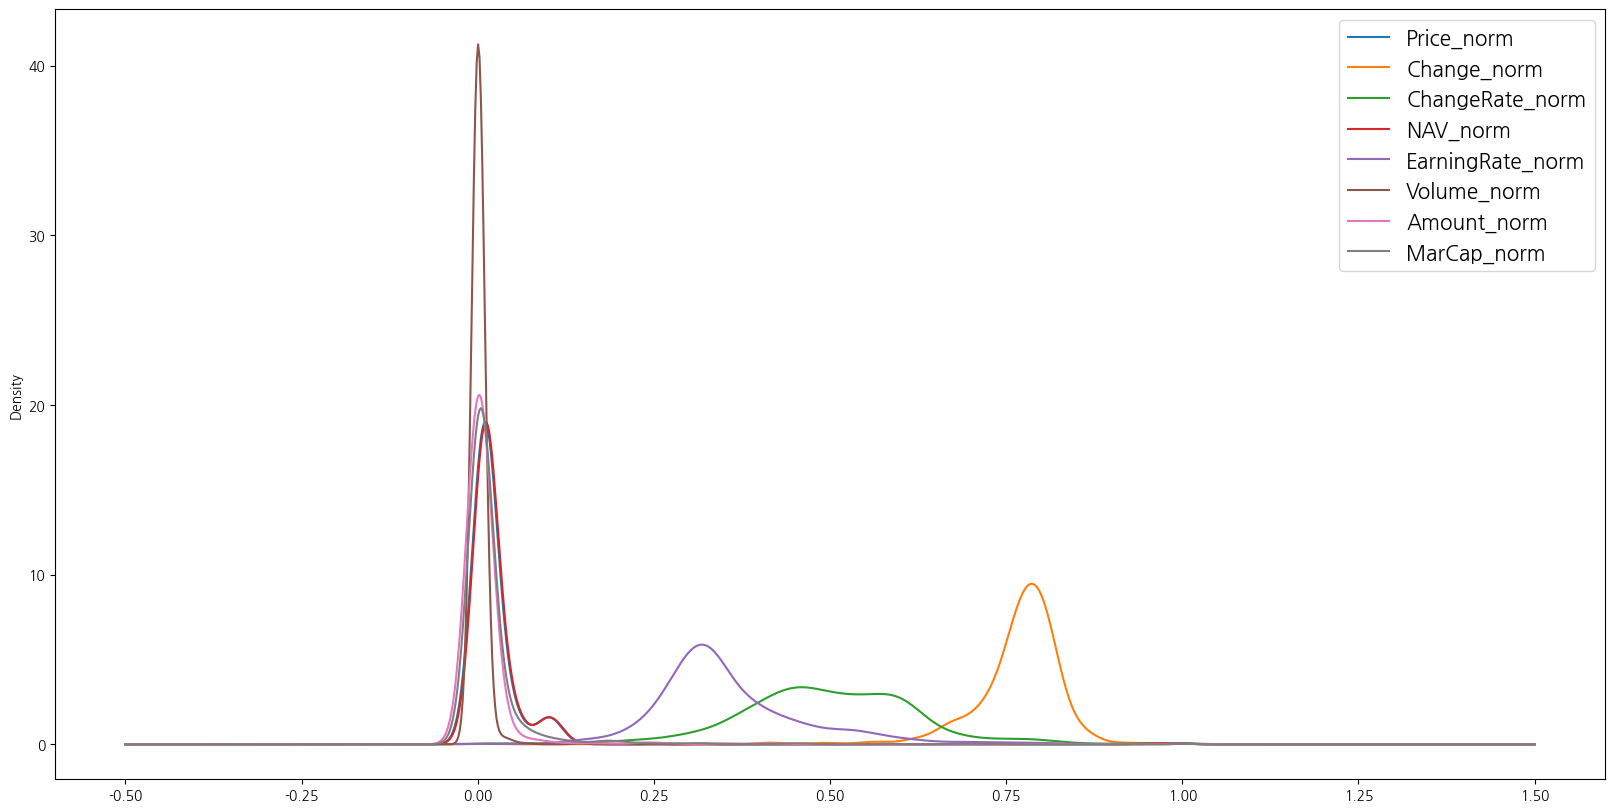

In [25]:
df_etfs.filter(regex=f'(_norm)$',axis=1).plot(kind='kde',figsize=(20,10))
plt.legend(fontsize=15)
plt.show()

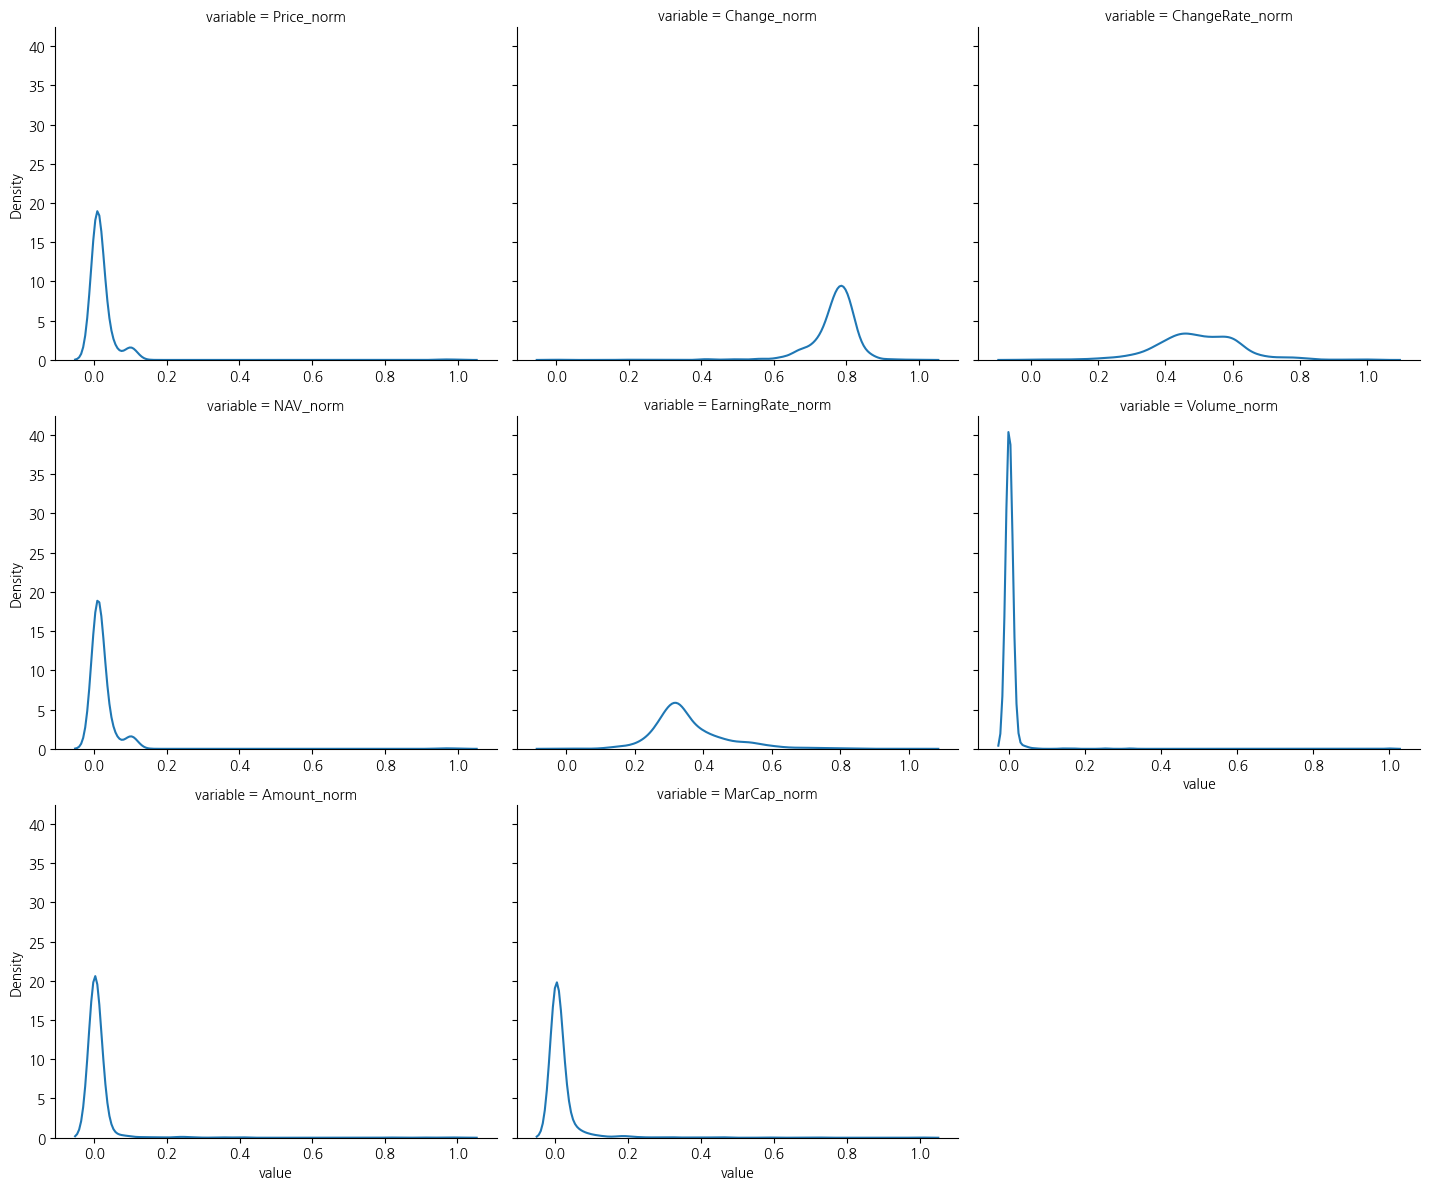

In [26]:
tmp = pd.melt(df_etfs.filter(regex=f'(_norm)$',axis=1))
g=sns.FacetGrid(data=tmp, col='variable',col_wrap=3, aspect=1.2, height=4, sharex=False)
g.map_dataframe(sns.kdeplot, x='value')

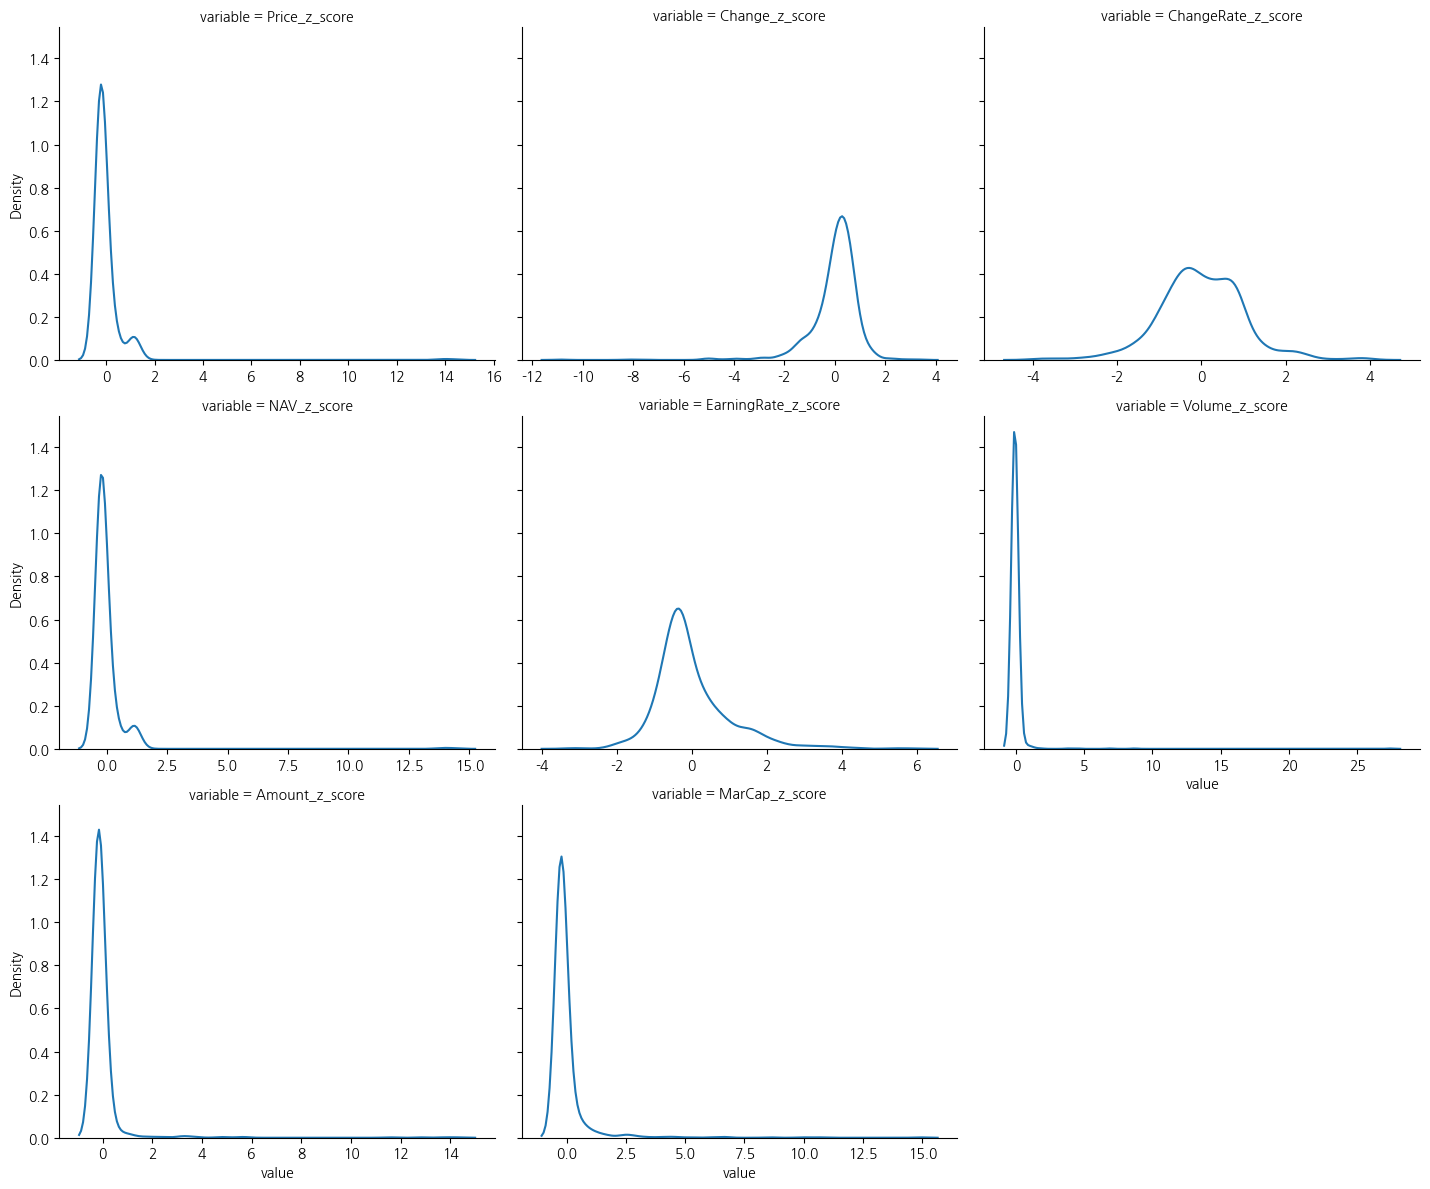

In [27]:
tmp = pd.melt(df_etfs.filter(regex=f'(_z_score)$',axis=1))
g=sns.FacetGrid(data=tmp, col='variable',col_wrap=3, aspect=1.2, height=4, sharex=False)
g.map_dataframe(sns.kdeplot, x='value')

#### 범주형 + 수치형 변수

Text(0.5, 1.0, '브랜드별 평균 3개월 수익률')

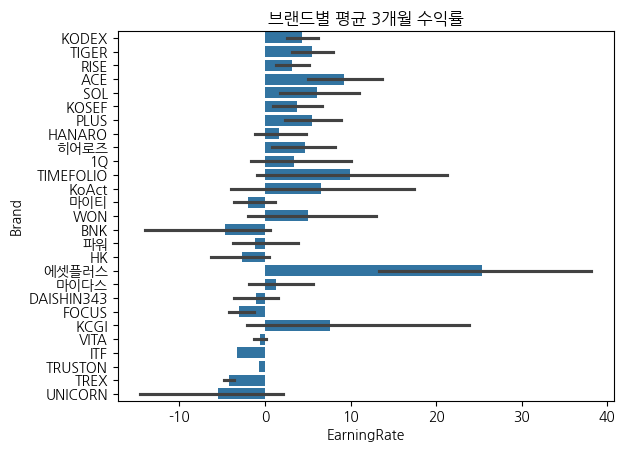

In [28]:
# 브랜드에 대한 3개월 수익률의 평균 시각화
g = sns.barplot(data=df_etfs,
                y='Brand',
                x='EarningRate',estimator=np.mean)
g.set_title('브랜드별 평균 3개월 수익률')

In [29]:
# 브랜드에 대한 3개월 수익률의 평균을 groupby로 직접 구하기
brand_3month_mean = df_etfs.groupby(['Brand']).agg({'EarningRate':'mean'})
brand_3month_mean

,EarningRate
Brand,
1Q,3.385340
ACE,9.257866
BNK,-4.690375
DAISHIN343,-1.050950
FOCUS,-3.066400
HANARO,1.583174
HK,-2.713825
ITF,-3.327800
KCGI,7.632300


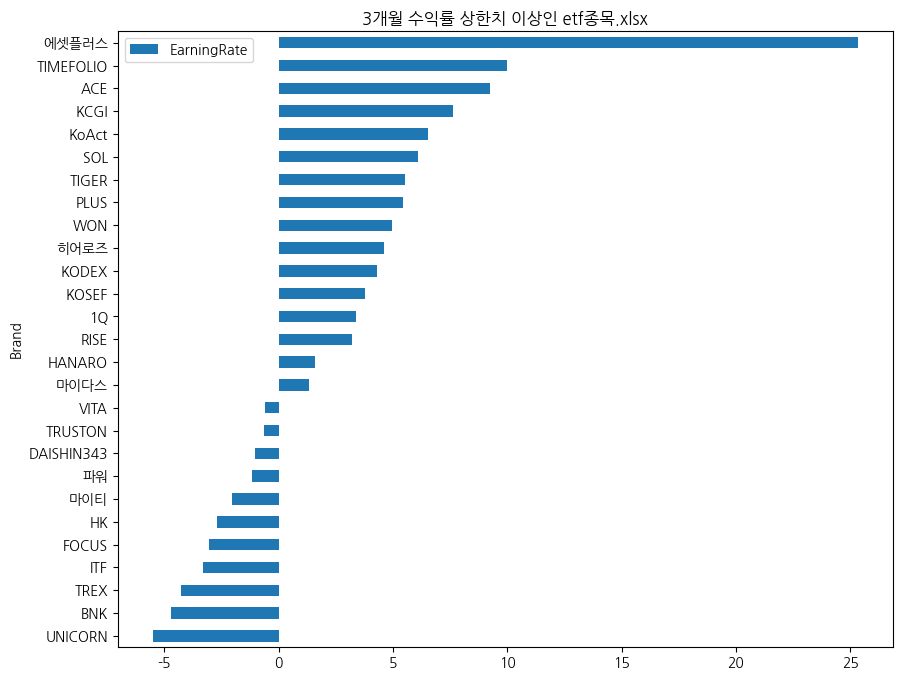

In [30]:
brand_3month_mean.sort_values(by='EarningRate').plot.barh(title='3개월 수익률 상한치 이상인 etf종목.xlsx',figsize=(10,8))
plt.show()

In [31]:
df_etfs.columns

Index(['Symbol', 'Category', 'CategoryName', 'Name', 'Price', 'RiseFall',
       'Change', 'ChangeRate', 'NAV', 'EarningRate', 'Volume', 'Amount',
       'MarCap', 'Brand', '인버스', '레버리지', '헤지', 'Price_z_score', 'Price_norm',
       'Change_z_score', 'Change_norm', 'ChangeRate_z_score',
       'ChangeRate_norm', 'NAV_z_score', 'NAV_norm', 'EarningRate_z_score',
       'EarningRate_norm', 'Volume_z_score', 'Volume_norm', 'Amount_z_score',
       'Amount_norm', 'MarCap_z_score', 'MarCap_norm'],
      dtype='object')

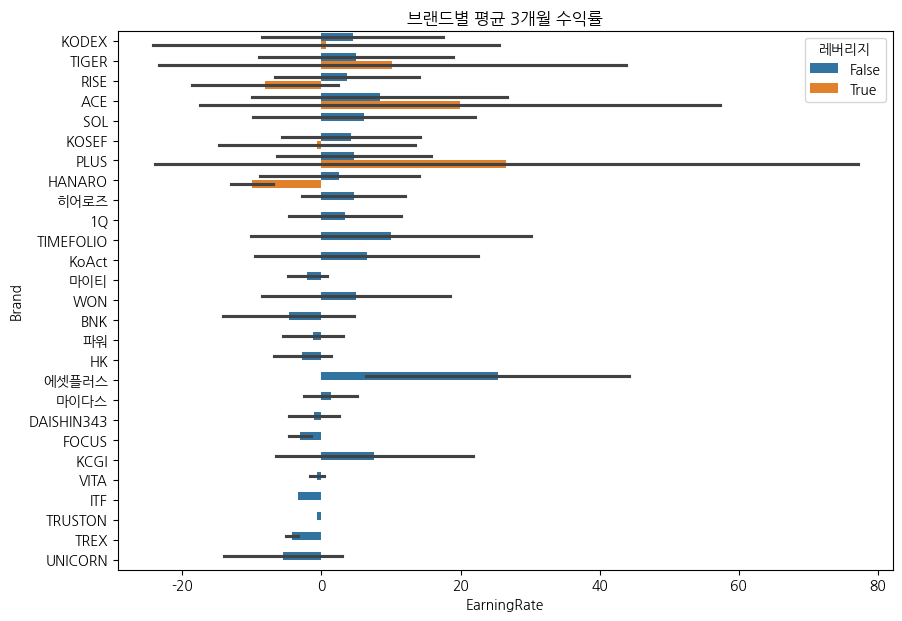

In [32]:
# 브랜드에 대한 3개월 수익률의 평균 시각화
plt.figure(figsize=(10,7))
g = sns.barplot(data=df_etfs,
                y='Brand',
                x='EarningRate',
                hue='레버리지',
                errorbar='sd',  # 표준편차
                estimator=np.mean)
g.set_title('브랜드별 평균 3개월 수익률')
plt.show()

In [33]:
g = df_etfs.groupby(['Brand','레버리지']).agg({'EarningRate':'mean'})
g.style.background_gradient(cmap='Greens')

In [37]:
df_etfs.Name.tolist()

['KODEX CD금리액티브(합성)',
 'TIGER CD금리투자KIS(합성)',
 'TIGER 미국S&P500',
 'KODEX 200',
 'KODEX KOFR금리액티브(합성)',
 'TIGER 미국나스닥100',
 'KODEX 머니마켓액티브',
 'TIGER KOFR금리액티브(합성)',
 'TIGER 미국테크TOP10 INDXX',
 'KODEX 미국S&P500TR',
 'KODEX 종합채권(AA-이상)액티브',
 'TIGER 미국필라델피아반도체나스닥',
 'KODEX 레버리지',
 'KODEX 200TR',
 'RISE 머니마켓액티브',
 'TIGER MSCI Korea TR',
 'TIGER 미국배당다우존스',
 'TIGER 200',
 'KODEX 1년은행양도성예금증서+액티브(합성)',
 'TIGER 차이나전기차SOLACTIVE',
 'ACE 미국30년국채액티브(H)',
 'KODEX 코스닥150레버리지',
 'KODEX 미국나스닥100TR',
 'KODEX 단기채권PLUS',
 'ACE 미국S&P500',
 'RISE 종합채권(A-이상)액티브',
 'TIGER 25-10 회사채(A+이상)액티브',
 'KODEX 200선물인버스2X',
 'ACE 미국나스닥100',
 'KODEX 코스닥150',
 'TIGER 미국30년국채커버드콜액티브(H)',
 'RISE 200',
 'TIGER CD1년금리액티브(합성)',
 'RISE CD금리액티브(합성)',
 'KODEX 삼성그룹',
 'KODEX 25-12 은행채(AAA)액티브',
 'KODEX 25-11 은행채(AA-이상)PLUS액티브',
 'TIGER 2차전지테마',
 'KODEX 2차전지산업',
 'TIGER 25-12 금융채(AA-이상)',
 'TIGER 미국배당다우존스타겟커버드콜2호',
 'KODEX MSCI Korea TR',
 'SOL 종합채권(AA-이상)액티브',
 'RISE 미국나스닥100',
 'TIGER 단기통안채',
 'SOL 미국배당다우존스',
 'KODEX Top5PlusTR',
 '

In [133]:
import re
matches = [item for item in df_etfs.Name.tolist() if re.compile(r'\d{1}X').search(item)]
matches

['KODEX 200선물인버스2X',
 'KODEX 미국달러선물인버스2X',
 'TIGER 200선물인버스2X',
 'RISE 200선물인버스2X',
 'TIGER 미국달러선물인버스2X',
 'KOSEF 미국달러선물인버스2X',
 'PLUS 200선물인버스2X',
 'KOSEF 200선물인버스2X',
 'HANARO 200선물레버리지1.5X',
 'HANARO 코스닥150선물레버리지1.5X']

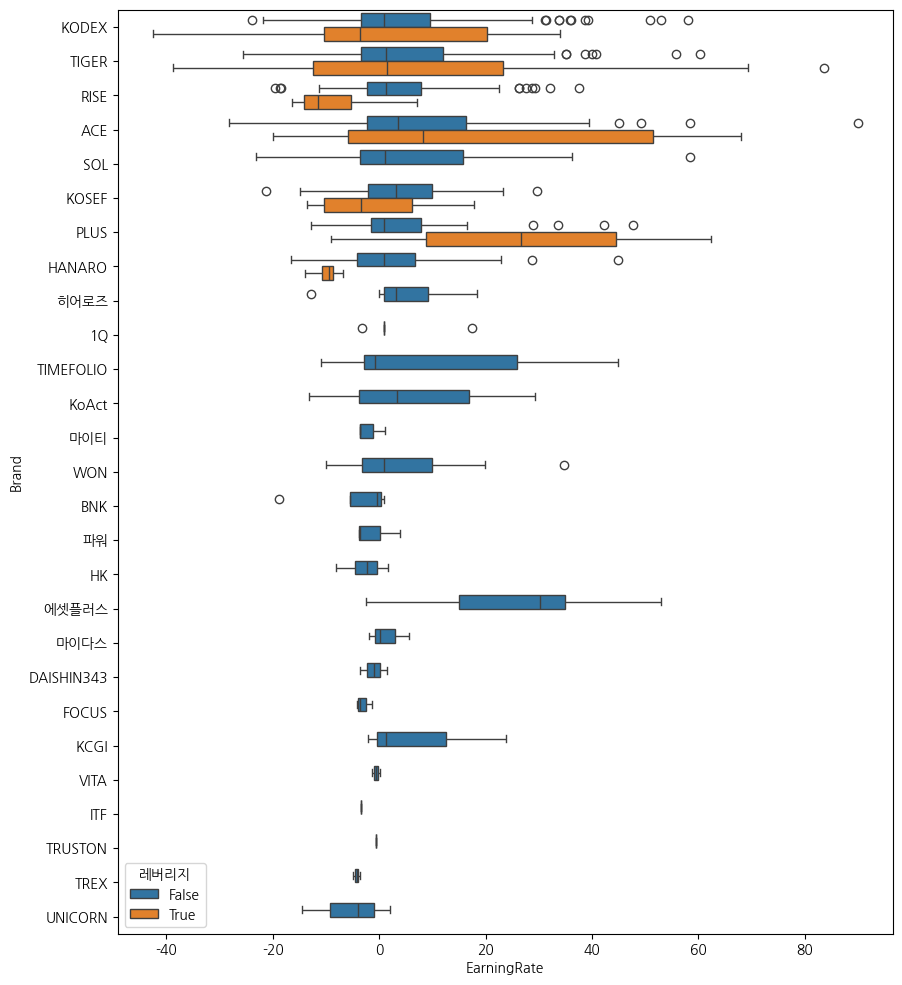

In [38]:
# 브랜드별 레버리지별 3개월 수익률에 대한 boxplot 시각화
plt.figure(figsize=(10,12))
sns.boxplot(data=df_etfs, x='EarningRate', y='Brand', hue='레버리지')
plt.show()

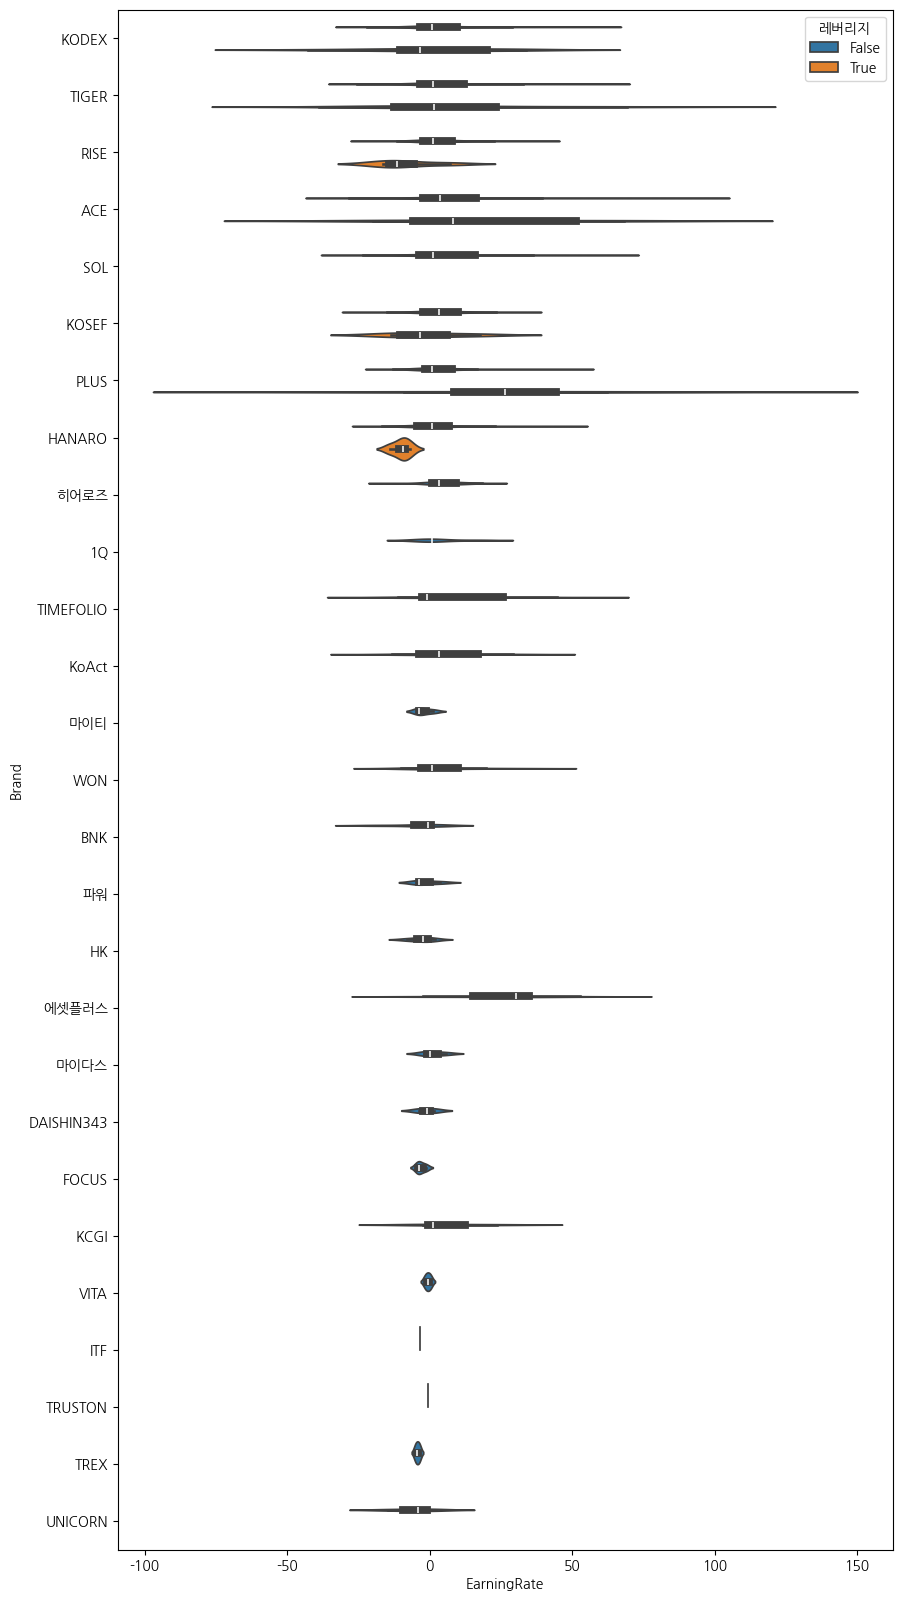

In [49]:
# 브랜드별 레버리지별 3개월 수익률에 대한 violinplot 시각화
plt.figure(figsize=(10,20))
sns.violinplot(data=df_etfs, x='EarningRate', y='Brand',hue='레버리지')
plt.show()

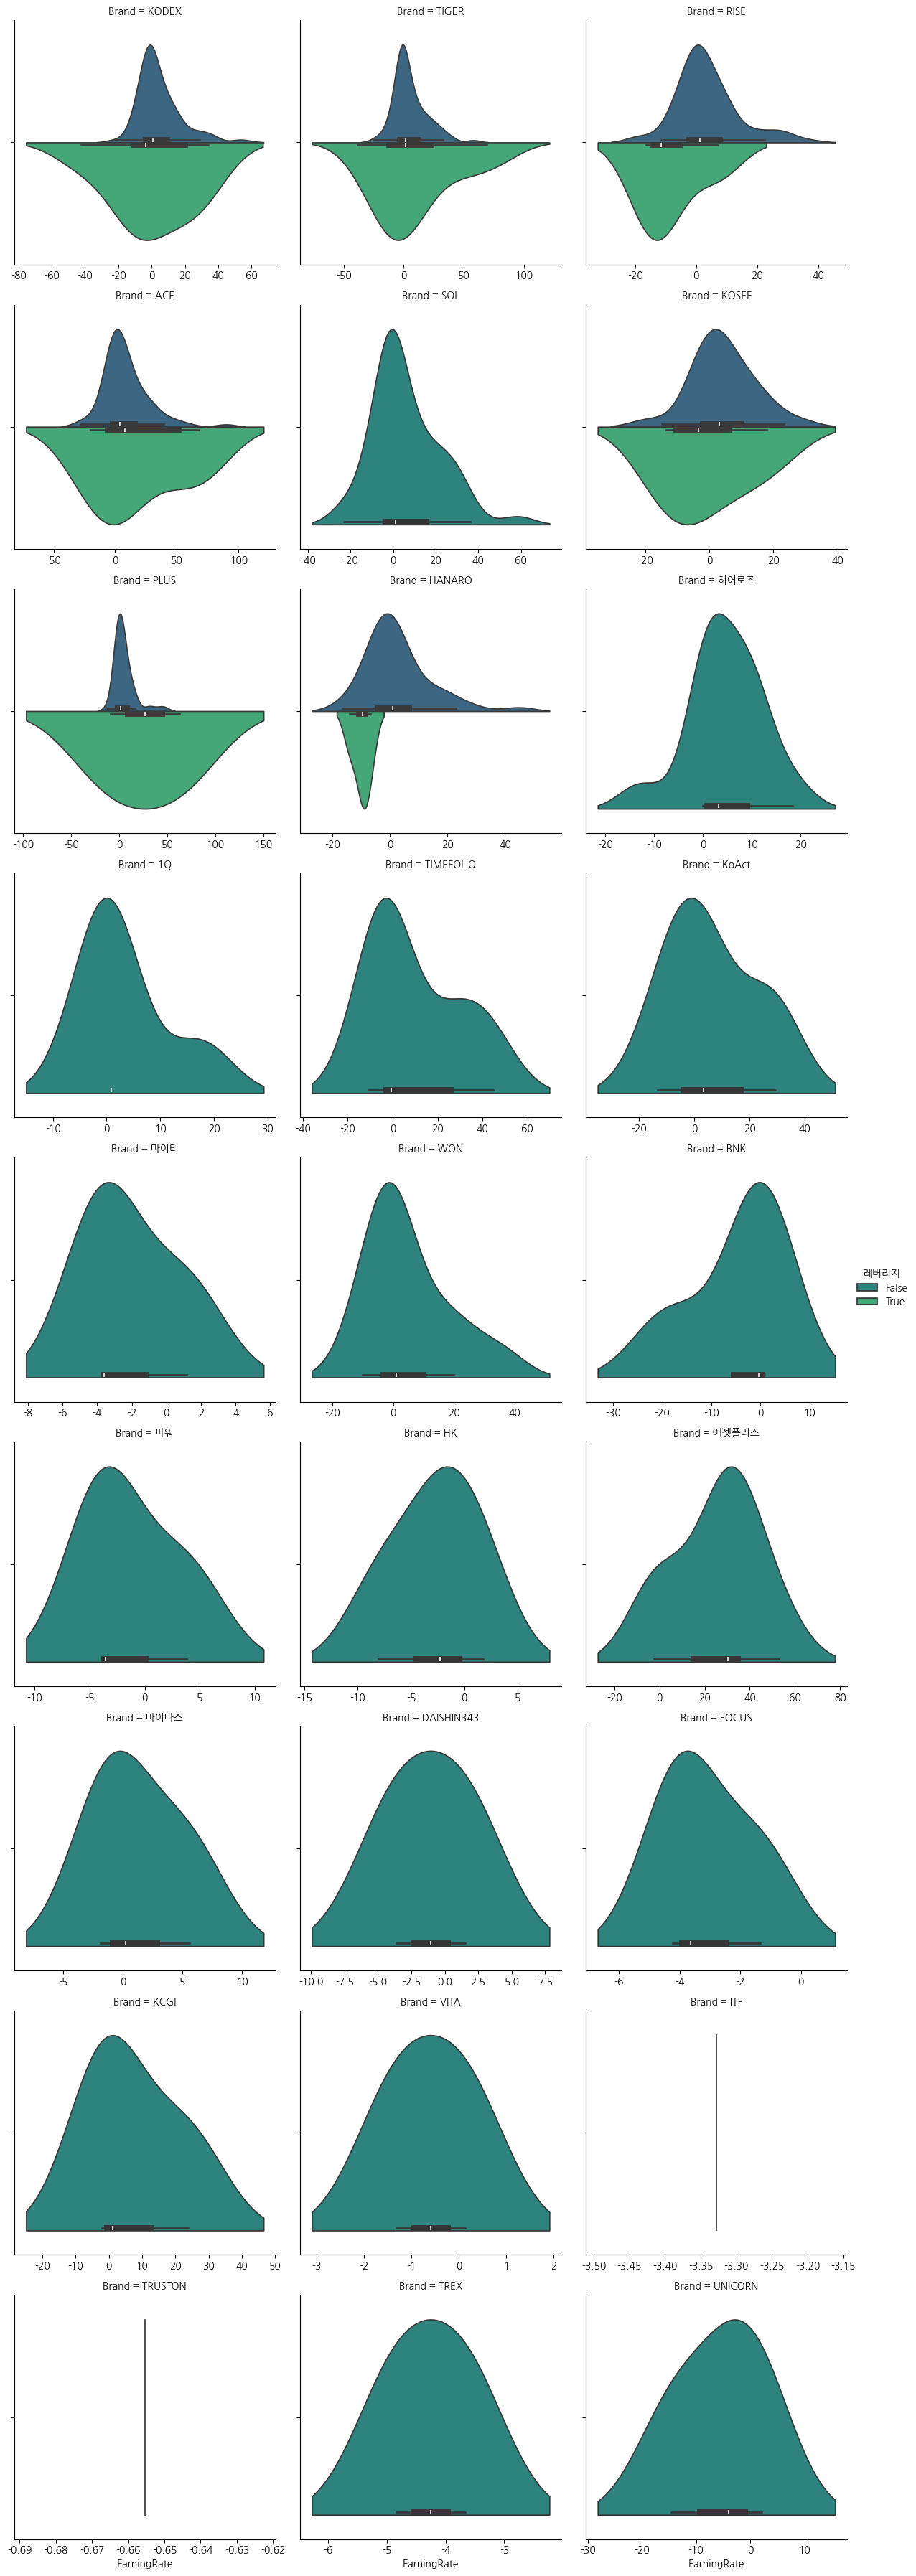

In [62]:
# 브랜드별 레버리지별 3개월 수익률에 대한 violinplot 시각화
g = sns.FacetGrid(data=df_etfs, col='Brand', col_wrap=3, height=4, sharex=False, sharey=False )
g.map_dataframe(sns.violinplot, x='EarningRate', hue='레버리지', palette='viridis', split=True)

# 범레 표시
g.add_legend(title='레버리지')
plt.show()

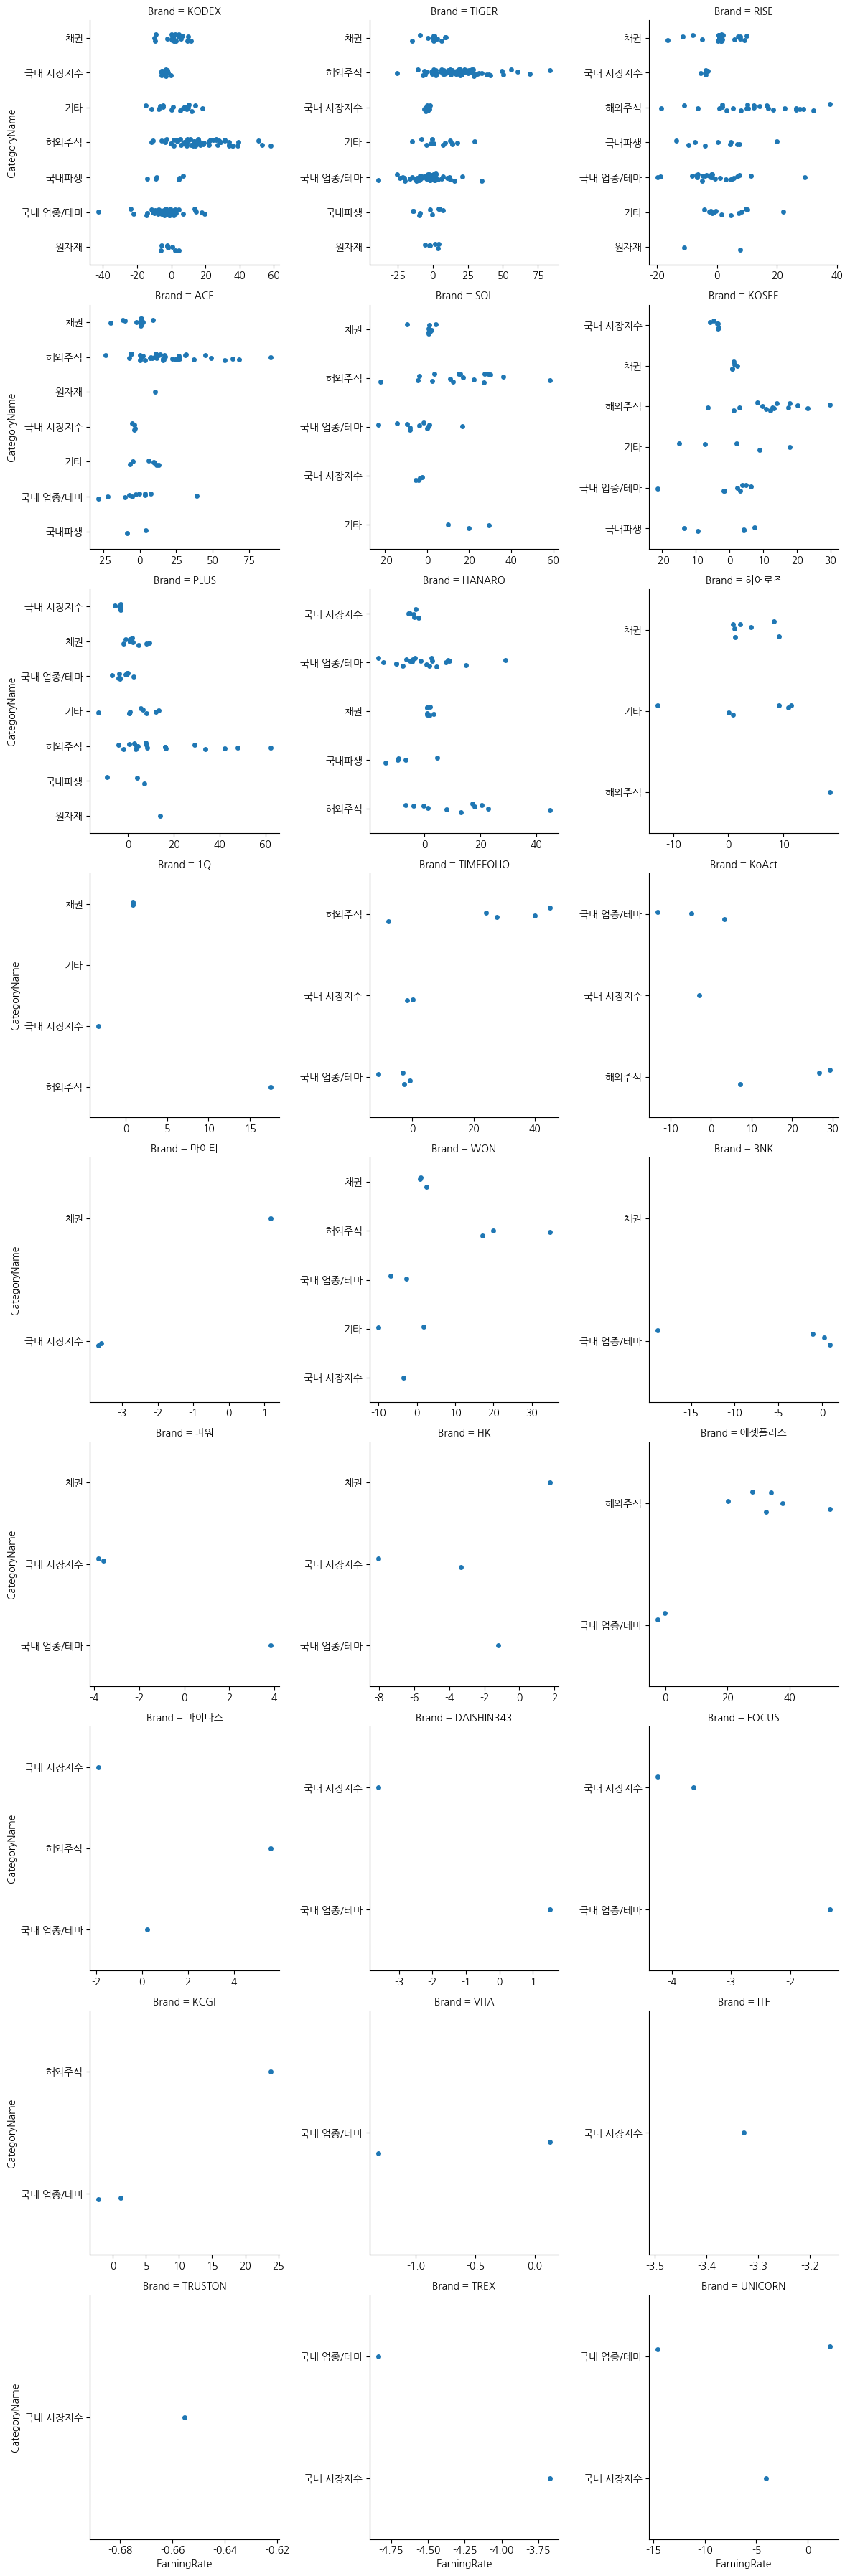

In [65]:
# 브랜드별 카테고리별 3개월 수익률에 대한 stripplot 시각화
g = sns.FacetGrid(data=df_etfs, col='Brand', col_wrap=3, height=4, sharex=False, sharey=False )
g.map_dataframe(sns.stripplot, y='CategoryName',x='EarningRate' )
plt.show()

In [67]:
sns.swarmplot?

Signature:
sns.swarmplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    order=None,
    hue_order=None,
    dodge=False,
    orient=None,
    color=None,
    palette=None,
    size=5,
    edgecolor=None,
    linewidth=0,
    hue_norm=None,
    log_scale=None,
    native_scale=False,
    formatter=None,
    legend='auto',
    warn_thresh=0.05,
    ax=None,
    **kwargs,
)
Docstring:
Draw a categorical scatterplot with points adjusted to be non-overlapping.

This function is similar to :func:`stripplot`, but the points are adjusted
(only along the categorical axis) so that they don't overlap. This gives a
better representation of the distribution of values, but it does not scale
well to large numbers of observations. This style of plot is sometimes
called a "beeswarm".

A swarm plot can be drawn on its own, but it is also a good complement
to a box or violin plot in cases where you want to show all observations
along with some representation of the underlying distributi

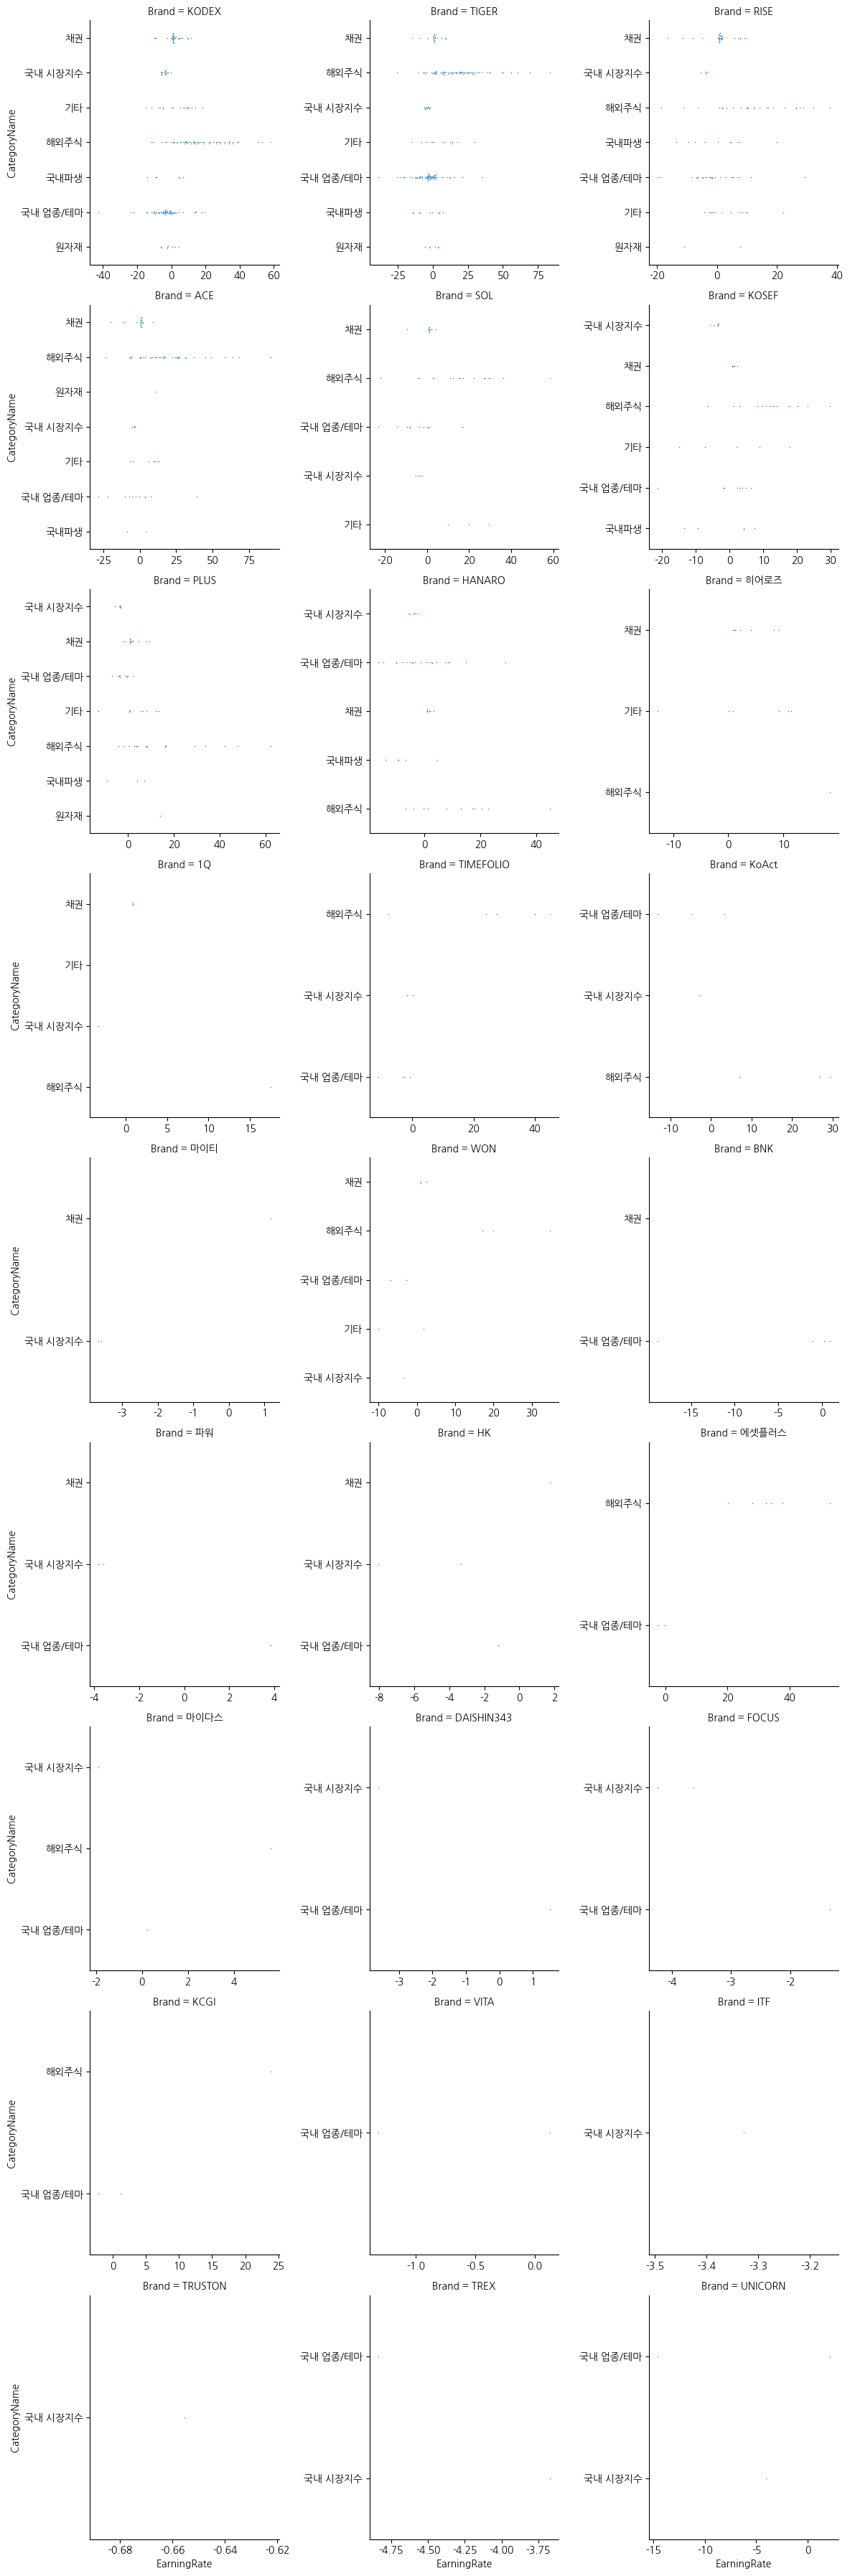

In [72]:
# 브랜드별 카테고리별 3개월 수익률에 대한 swarmplot 시각화
g = sns.FacetGrid(data=df_etfs, col='Brand', col_wrap=3, height=4, sharex=False, sharey=False )

g.map_dataframe(sns.swarmplot, y='CategoryName',x='EarningRate', size=1 ) #size단위 point , 1 pint = 약 1/72인치
plt.show()

### 3개월 수익률에 대한 기술 통계 구하기

In [88]:
df_etfs.groupby(['Brand','레버리지'])['EarningRate'].describe().style.background_gradient(cmap='Greens')
df_etfs.query('레버리지 == True').groupby(['Brand','레버리지'])['EarningRate'].describe().style.background_gradient(cmap='Greens')

,,count,mean,std,min,25%,50%,75%,max
Brand,레버리지,,,,,,,,
ACE,True,6.000000,19.950283,37.390051,-19.907500,-5.899050,8.195300,51.362950,68.063600
HANARO,True,4.000000,-9.933375,3.008654,-14.003800,-10.790875,-9.485300,-8.627800,-6.759100
KODEX,True,8.000000,0.702787,24.898858,-42.489800,-10.452425,-3.518150,20.244450,33.928500
KOSEF,True,4.000000,-0.650250,14.049175,-13.483200,-10.376850,-3.492200,6.234400,17.866600
PLUS,True,2.000000,26.567700,50.496758,-9.138900,8.714400,26.567700,44.421000,62.274300
RISE,True,4.000000,-8.064500,10.477812,-16.329500,-14.194325,-11.507200,-5.377375,7.085900
TIGER,True,18.000000,10.218494,33.620827,-38.745100,-12.501975,1.385150,23.361550,83.611500


#### PLUS ETF 따로 분석하기

In [90]:
df_plus = df_etfs[df_etfs['Brand'] == 'PLUS']
df_plus

,Symbol,Category,CategoryName,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap,Brand,인버스,레버리지,헤지,Price_z_score,Price_norm,Change_z_score,Change_norm,ChangeRate_z_score,ChangeRate_norm,NAV_z_score,NAV_norm,EarningRate_z_score,EarningRate_norm,Volume_z_score,Volume_norm,Amount_z_score,Amount_norm,MarCap_z_score,MarCap_norm
63,152100,1,국내 시장지수,PLUS 200,32845,5,-780,-2.32,32923.0,-3.7416,318581,10483,5534,PLUS,False,False,False,0.088070,0.029818,-1.525459,0.658560,-0.581072,0.423611,0.089048,0.031093,-0.592323,0.292708,-0.018471,2.728854e-03,0.315337,0.034234,0.590562,0.058103
75,477050,6,채권,PLUS 머니마켓액티브,51430,2,15,0.03,51434.0,0.9027,5029,258,4682,PLUS,False,False,False,0.349031,0.047414,0.667817,0.813230,0.846220,0.604938,0.348992,0.048601,-0.276087,0.327791,-0.092231,4.307666e-05,-0.165771,0.000843,0.454599,0.049143
80,161510,2,국내 업종/테마,PLUS 고배당주,14790,5,-175,-1.17,14794.0,-0.6441,203132,3007,4526,PLUS,False,False,False,-0.165449,0.012724,0.143638,0.776265,0.117390,0.512346,-0.165533,0.013947,-0.381410,0.316107,-0.045629,1.739958e-03,-0.036425,0.009820,0.429705,0.047502
117,451000,6,채권,PLUS 종합채권(AA-이상)액티브,113135,5,-870,-0.76,113329.0,2.2466,25,2,2595,PLUS,False,False,False,1.215461,0.105835,-1.773754,0.641051,0.366407,0.543981,1.218165,0.107142,-0.184579,0.337943,-0.093408,2.141413e-07,-0.177816,0.000007,0.121556,0.027195
130,449450,2,국내 업종/테마,PLUS K방산,17655,2,35,0.20,17708.0,-0.3676,226708,3980,2269,PLUS,False,False,False,-0.125220,0.015436,0.722993,0.817121,0.949471,0.618056,-0.124612,0.016703,-0.362583,0.318195,-0.040083,1.941902e-03,0.009357,0.012997,0.069533,0.023767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,433860,7,기타,PLUS TDF2040액티브,12840,5,-120,-0.93,12811.0,6.5789,1037,13,27,PLUS,False,False,False,-0.192830,0.010878,0.295374,0.786965,0.263156,0.530864,-0.193379,0.012071,0.110412,0.370670,-0.093170,8.882580e-06,-0.177299,0.000042,-0.288246,0.000189
912,433870,7,기타,PLUS TDF2050액티브,13915,5,-365,-2.56,14036.0,12.0879,1028,14,25,PLUS,False,False,False,-0.177735,0.011895,-0.380542,0.739300,-0.726838,0.405093,-0.176177,0.013230,0.485526,0.412286,-0.093172,8.805489e-06,-0.177252,0.000046,-0.288565,0.000168
914,433850,7,기타,PLUS TDF2030액티브,12330,5,-75,-0.60,12362.0,5.4846,88,1,25,PLUS,False,False,False,-0.199991,0.010395,0.419521,0.795720,0.463584,0.556327,-0.199684,0.011647,0.035900,0.362404,-0.093393,7.537773e-07,-0.177864,0.000003,-0.288565,0.000168
917,415920,5,원자재,PLUS 글로벌희토류&전략자원생산기업,4130,5,-70,-1.67,4080.0,14.1304,5400,21,23,PLUS,False,False,False,-0.315131,0.002631,0.433315,0.796693,-0.186289,0.473765,-0.315986,0.003813,0.624603,0.427715,-0.092144,4.625451e-05,-0.176923,0.000069,-0.288885,0.000147


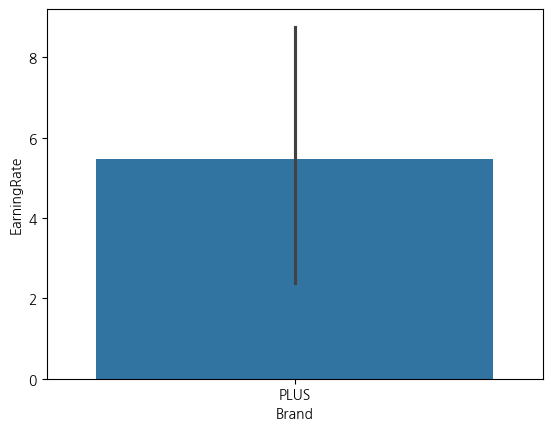

In [93]:
sns.barplot(data=df_plus, x='Brand', y='EarningRate',estimator=np.mean)
plt.show()

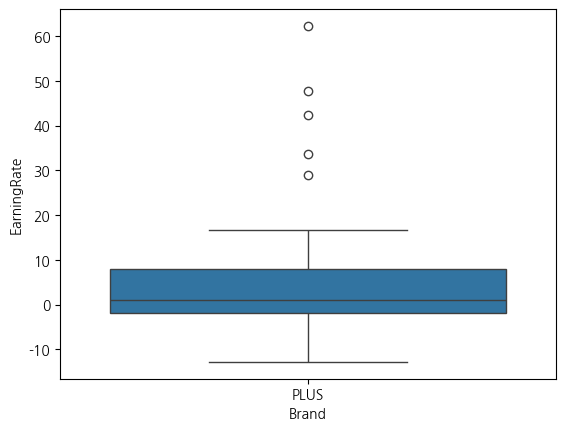

In [96]:
sns.boxplot(data=df_plus, x='Brand', y='EarningRate')
plt.show()

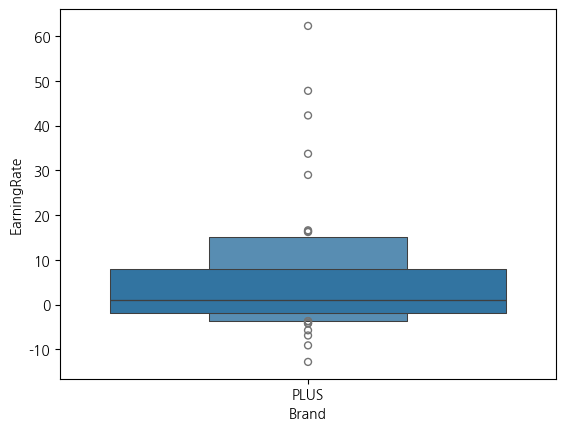

In [97]:
sns.boxenplot(data=df_plus, x='Brand', y='EarningRate')
plt.show()

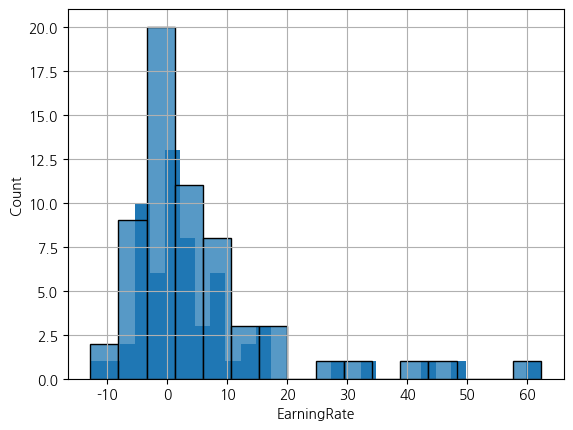

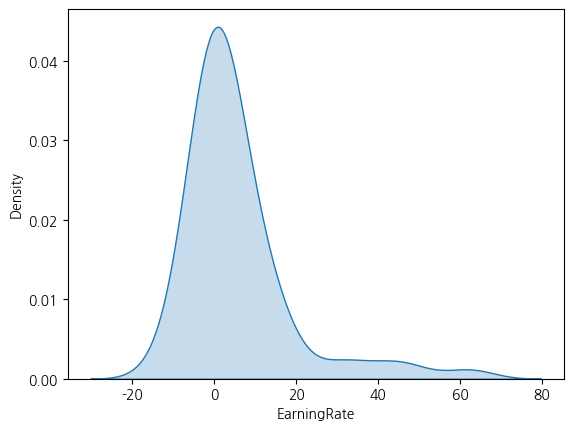

In [107]:
df_plus['EarningRate'].hist(bins=30)
sns.histplot(data=df_plus, x='EarningRate')
plt.show()
sns.kdeplot(data=df_plus, x='EarningRate', fill=True)
plt.show()

In [126]:
sns.violinplot?

Signature:
sns.violinplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    fill=True,
    inner='box',
    split=False,
    width=0.8,
    dodge='auto',
    gap=0,
    linewidth=None,
    linecolor='auto',
    cut=2,
    gridsize=100,
    bw_method='scott',
    bw_adjust=1,
    density_norm='area',
    common_norm=False,
    hue_norm=None,
    formatter=None,
    log_scale=None,
    native_scale=False,
    legend='auto',
    scale=<deprecated>,
    scale_hue=<deprecated>,
    bw=<deprecated>,
    inner_kws=None,
    ax=None,
    **kwargs,
)
Docstring:
Draw a patch representing a KDE and add observations or box plot statistics.

A violin plot plays a similar role as a box-and-whisker plot. It shows the
distribution of data points after grouping by one (or more) variables.
Unlike a box plot, each violin is drawn using a kernel density estimate
of the underlying dist

<Axes: xlabel='Brand', ylabel='EarningRate'>

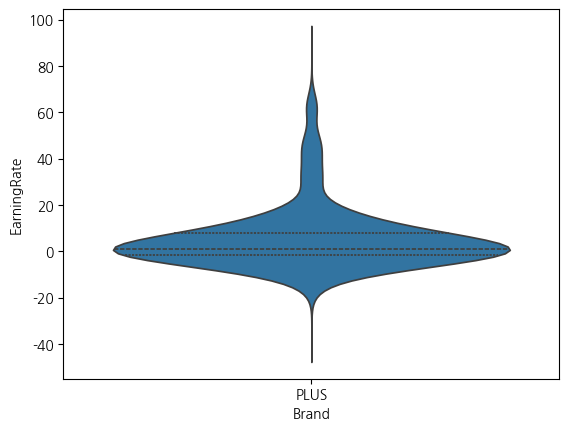

In [125]:
sns.violinplot(data=df_plus, y='EarningRate', x='Brand', inner='quartile', cut=6)

<Axes: xlabel='Brand', ylabel='EarningRate'>

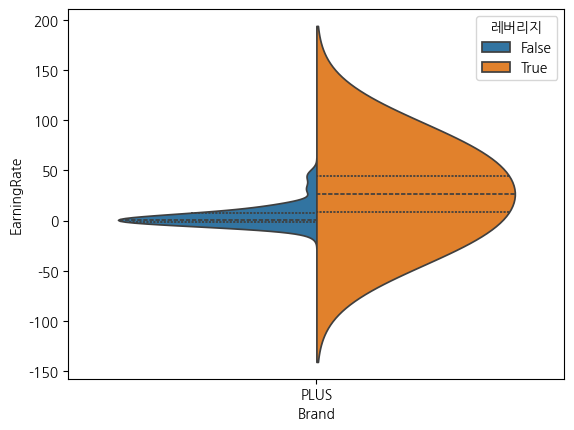

In [130]:
sns.violinplot(data=df_plus, y='EarningRate', x='Brand', hue='레버리지', inner='quartile', cut=3, split=True)

<Axes: xlabel='Brand', ylabel='EarningRate'>

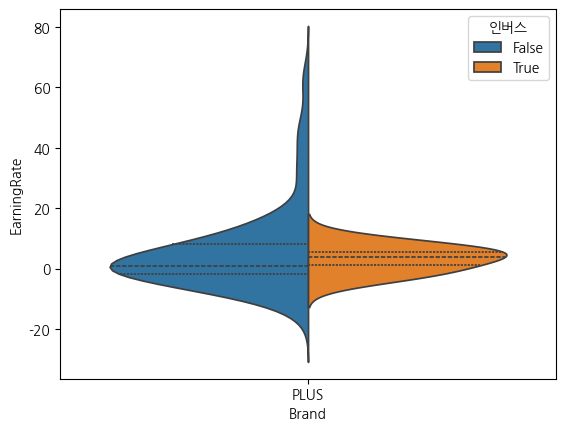

In [131]:
sns.violinplot(data=df_plus, y='EarningRate', x='Brand', hue='인버스', inner='quartile', cut=3, split=True)

### 서브플롯 그려보기

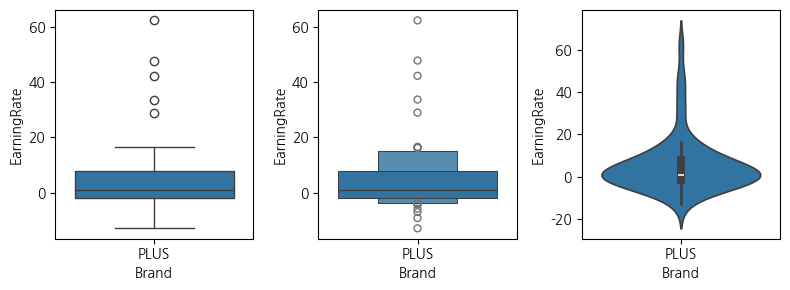

In [142]:
fig, axes = plt.subplots(ncols=3,figsize=(8,3))
sns.boxplot(data=df_plus, y='EarningRate', x='Brand', ax=axes[0])
sns.boxenplot(data=df_plus, y='EarningRate', x='Brand', ax=axes[1])
sns.violinplot(data=df_plus, y='EarningRate', x='Brand', ax=axes[2])
plt.tight_layout()
plt.show()

#### 브랜드별 거래량

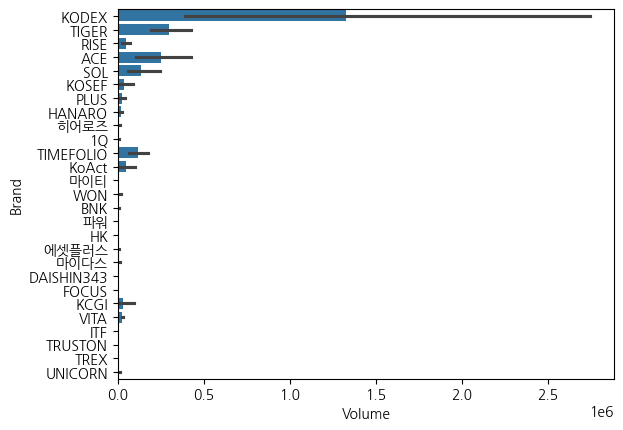

In [152]:
sns.barplot(data=df_etfs, x='Volume', y='Brand', estimator=np.mean)
plt.show()

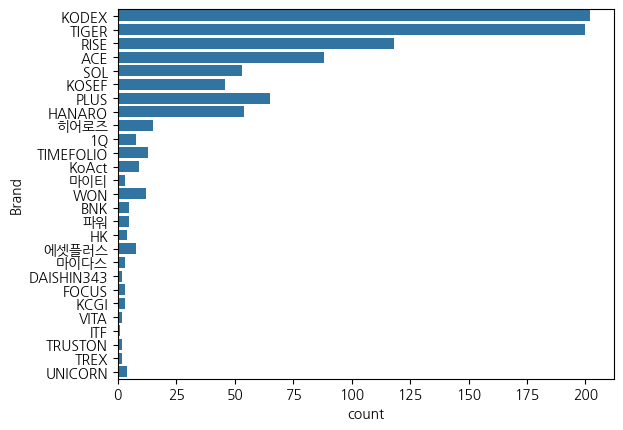

In [149]:
sns.countplot(data=df_etfs, y='Brand')
plt.show()

In [153]:
df_etfs['Brand'].unique()

array(['KODEX', 'TIGER', 'RISE', 'ACE', 'SOL', 'KOSEF', 'PLUS', 'HANARO',
       '히어로즈', '1Q', 'TIMEFOLIO', 'KoAct', '마이티', 'WON', 'BNK', '파워',
       'HK', '에셋플러스', '마이다스', 'DAISHIN343', 'FOCUS', 'KCGI', 'VITA',
       'ITF', 'TRUSTON', 'TREX', 'UNICORN'], dtype=object)

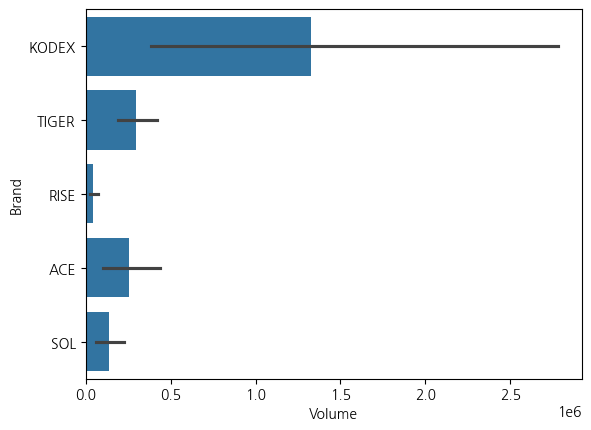

In [158]:
sns.barplot(data=df_etfs[df_etfs['Brand'].isin(['KODEX', 'TIGER', 'RISE', 'ACE', 'SOL'])], x='Volume', y='Brand', estimator=np.mean)
plt.show()

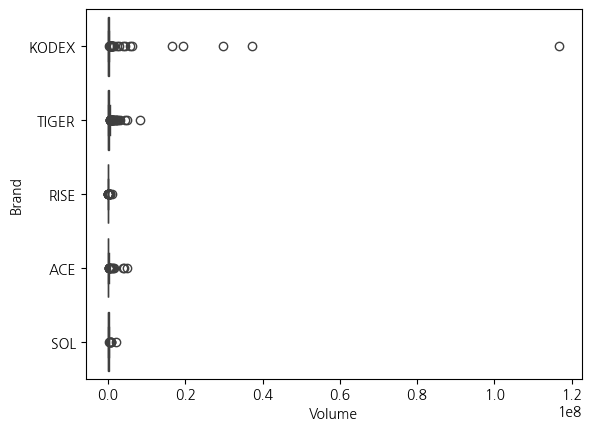

In [160]:
sns.boxplot(data=df_etfs[df_etfs['Brand'].isin(['KODEX', 'TIGER', 'RISE', 'ACE', 'SOL'])], x='Volume', y='Brand')
plt.show()

#### 카테고리별 거래량

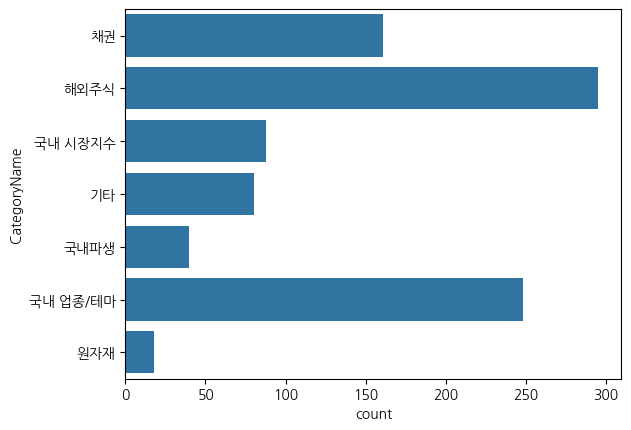

In [161]:
sns.countplot(data=df_etfs, y='CategoryName')
plt.show()

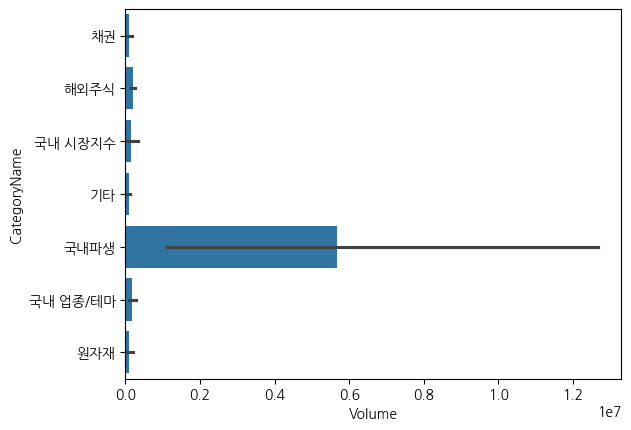

In [163]:
sns.barplot(data=df_etfs, y='CategoryName', x='Volume')
plt.show()

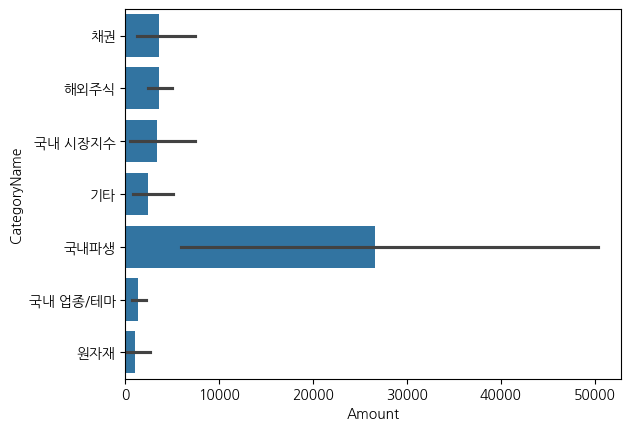

In [164]:
sns.barplot(data=df_etfs, y='CategoryName', x='Amount')
plt.show()

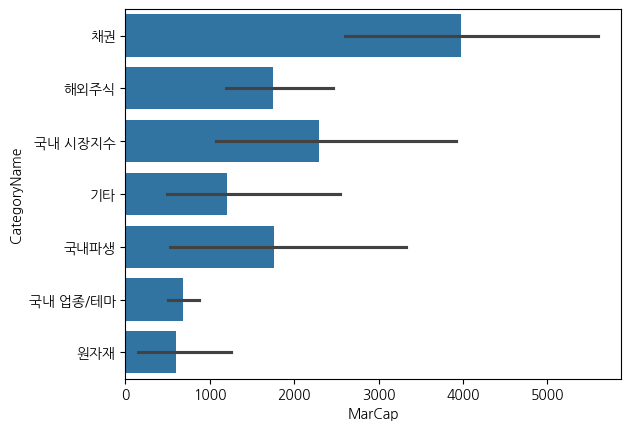

In [165]:
sns.barplot(data=df_etfs, y='CategoryName', x='MarCap')
plt.show()

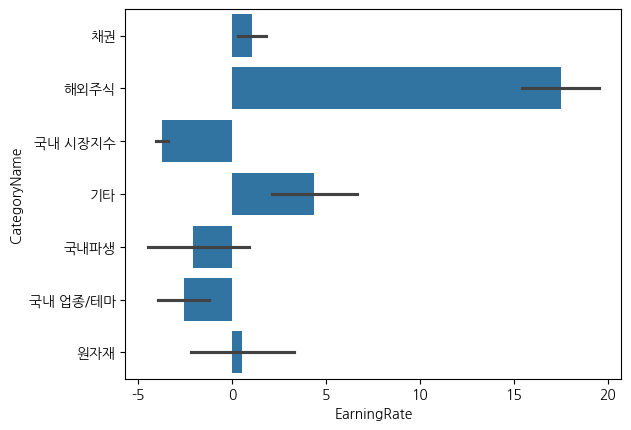

In [166]:
sns.barplot(data=df_etfs, y='CategoryName', x='EarningRate')
plt.show()

- 문제) seaborn 라이브러리 사용해서 시각화 하기
    - 1. 카테고리별 브랜드별 빈도수 시각화하기

        - case1) 서브플롯 생성해서 시각화하기 (Axes레벨)
        - case2) catplot (Figure 레벨) 사용
        - case3) FacetGrid (Figure 레벨) 사용


In [191]:
df_etfs.columns

Index(['Symbol', 'Category', 'CategoryName', 'Name', 'Price', 'RiseFall',
       'Change', 'ChangeRate', 'NAV', 'EarningRate', 'Volume', 'Amount',
       'MarCap', 'Brand', '인버스', '레버리지', '헤지', 'Price_z_score', 'Price_norm',
       'Change_z_score', 'Change_norm', 'ChangeRate_z_score',
       'ChangeRate_norm', 'NAV_z_score', 'NAV_norm', 'EarningRate_z_score',
       'EarningRate_norm', 'Volume_z_score', 'Volume_norm', 'Amount_z_score',
       'Amount_norm', 'MarCap_z_score', 'MarCap_norm'],
      dtype='object')

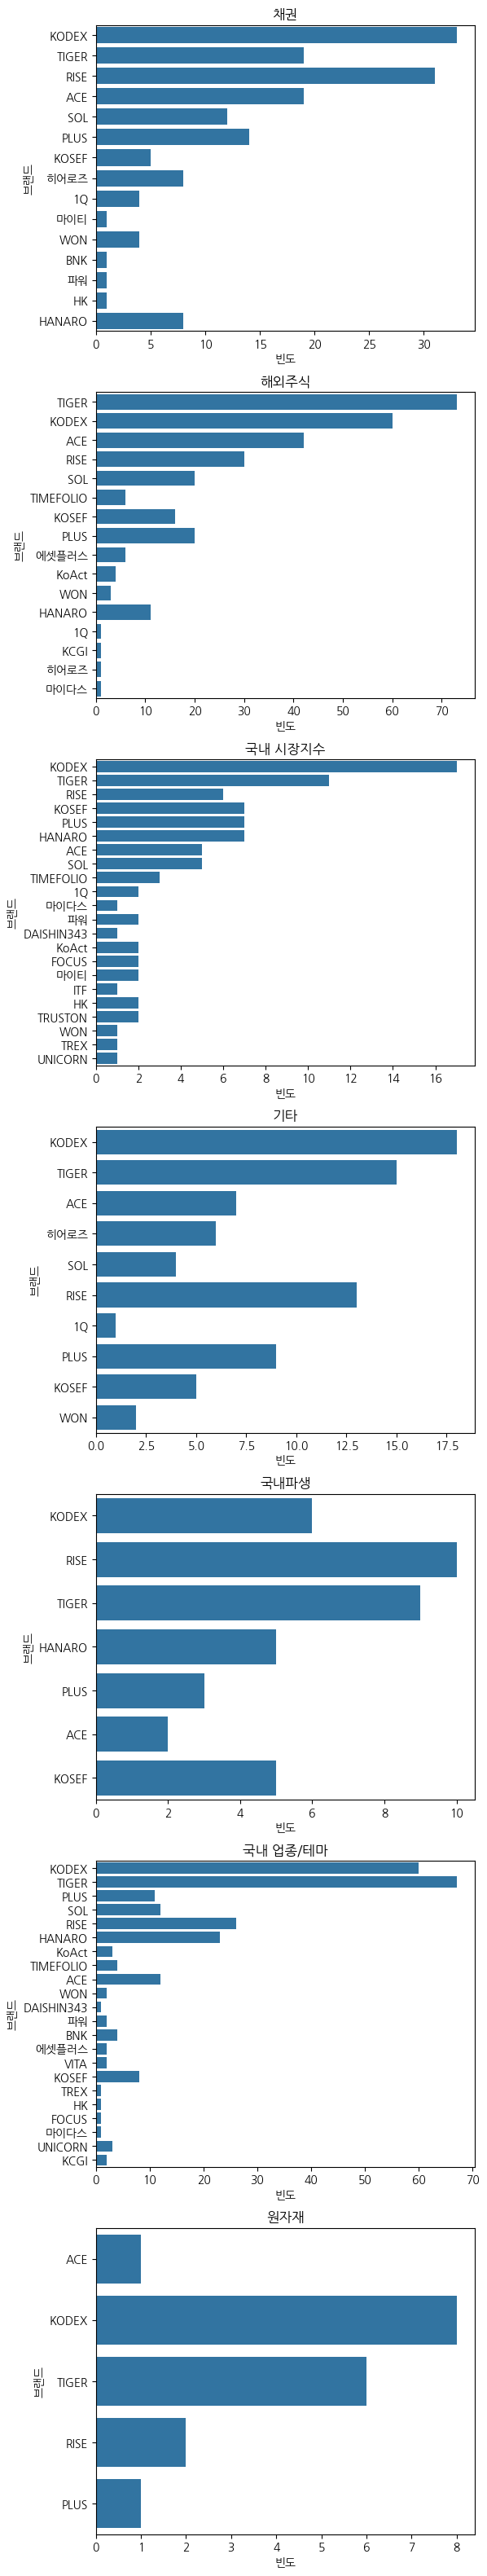

In [197]:
# case1) 서브플롯 생성해서 시각화하기 (Axes레벨)
cols = df_etfs['CategoryName'].unique()
fig, axes = plt.subplots(nrows=len(cols),figsize=(6,40))
for i, col in enumerate(cols):
    sns.countplot(data=df_etfs[df_etfs['CategoryName'] == col], y='Brand', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('빈도')
    axes[i].set_ylabel('브랜드')
plt.show()

In [ ]:
g.fig.suptitle?

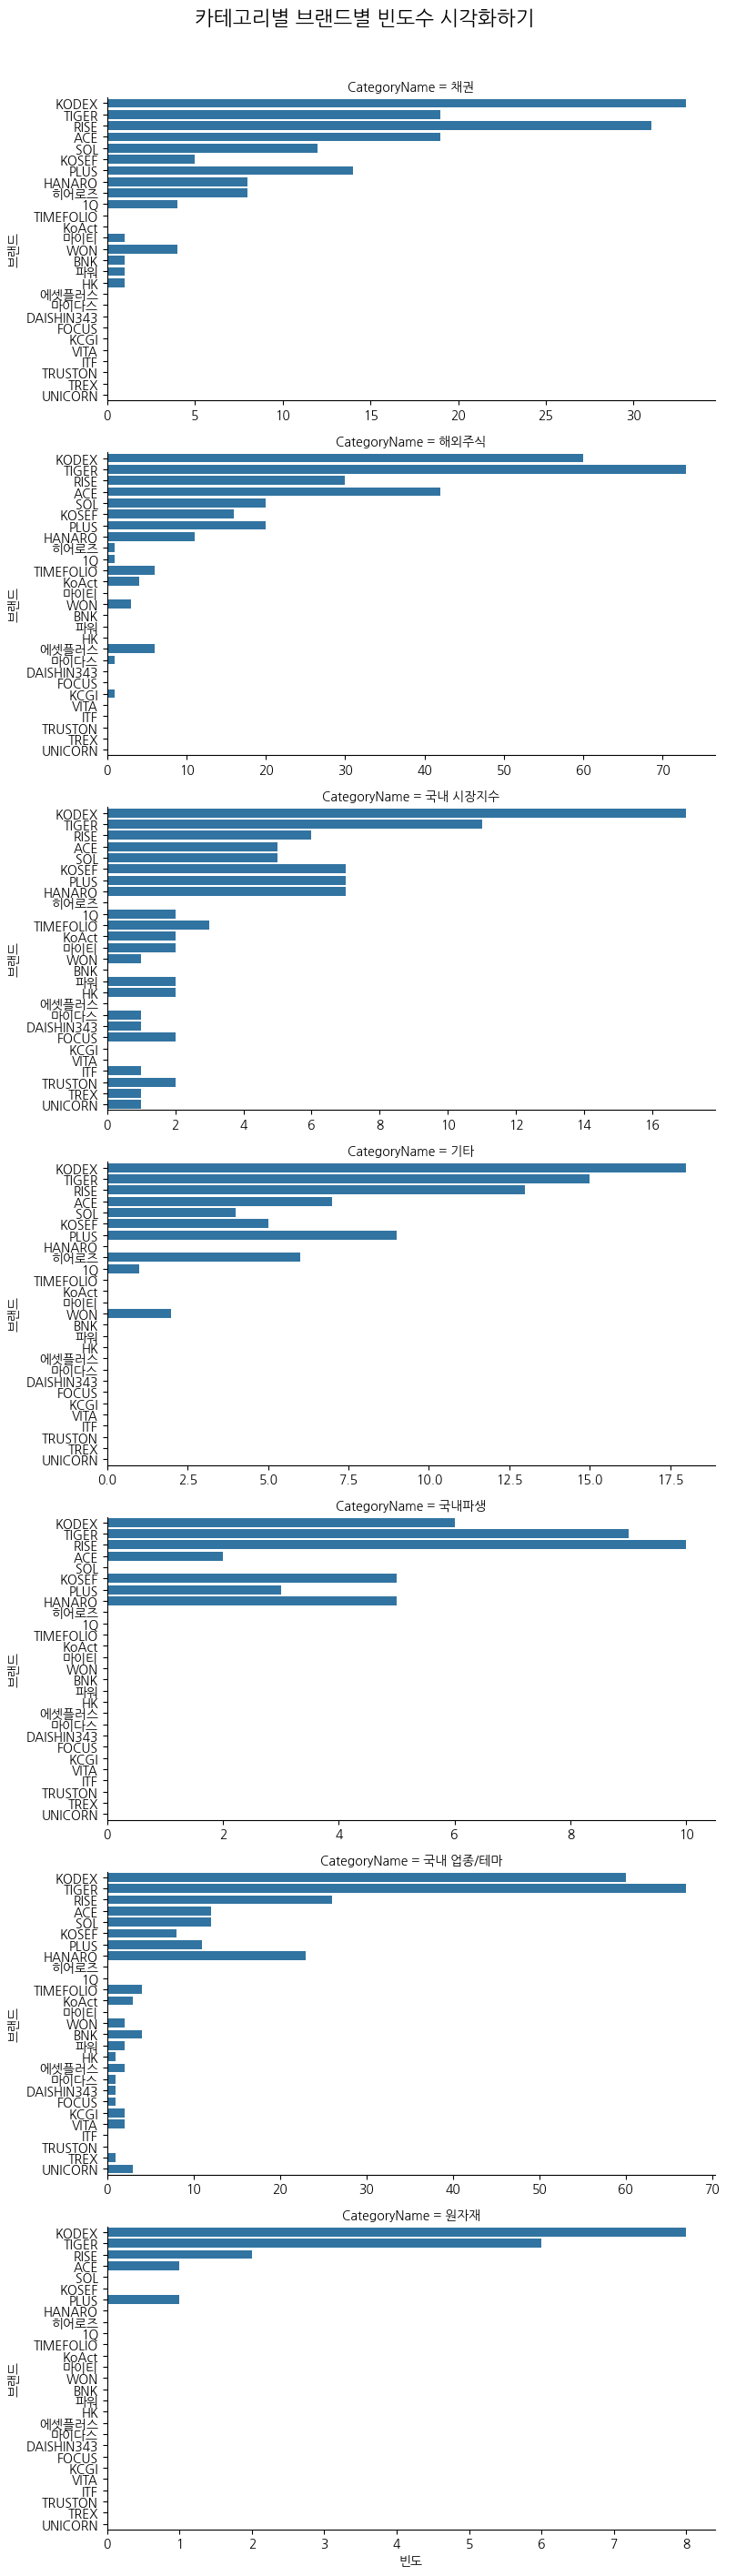

In [231]:
# case2) catplot (Figure 레벨) 사용
g = sns.catplot(data=df_etfs, y='Brand', col='CategoryName', kind='count', col_wrap=1, height=4, aspect=2, sharex=False)
g.set_axis_labels('빈도','브랜드')

# plt.subplots_adjust(top=0.9)
g.fig.suptitle('카테고리별 브랜드별 빈도수 시각화하기',fontsize=16, y=1.01)
plt.tight_layout()
plt.show()


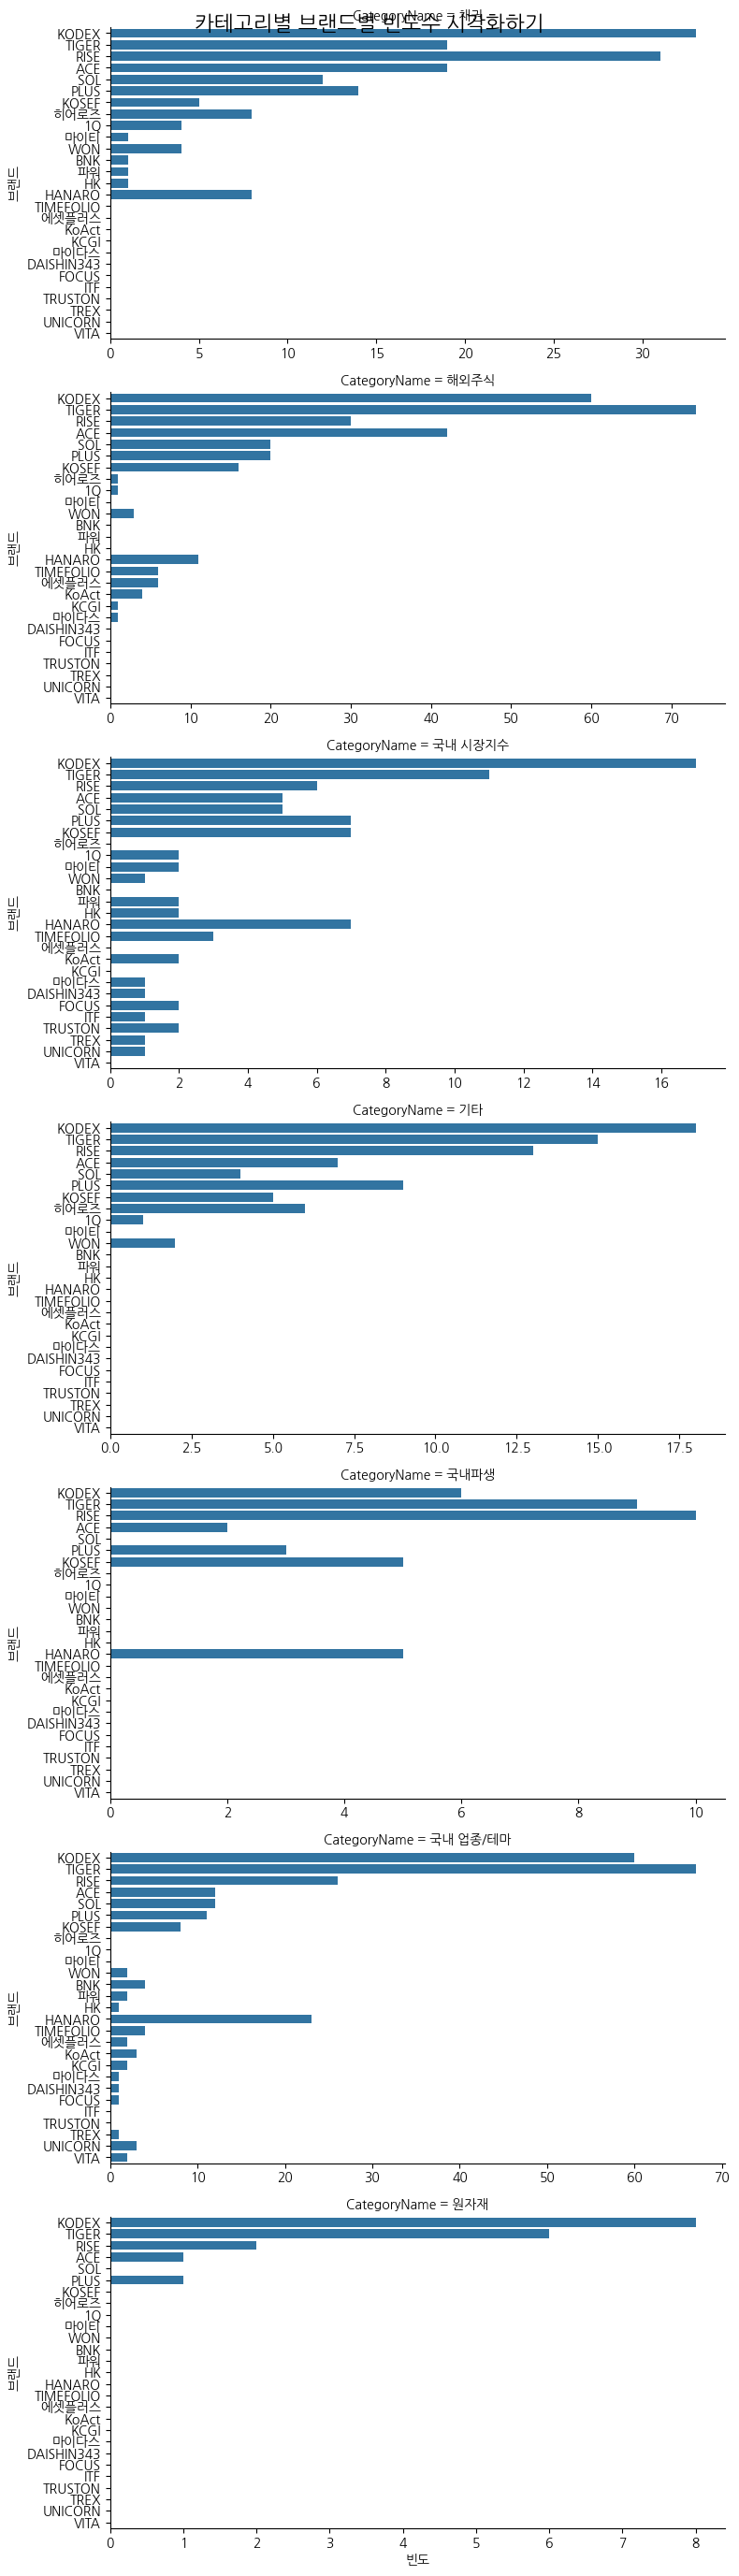

In [221]:
# case3) FacetGrid (Figure 레벨) 사용
g = sns.FacetGrid(data=df_etfs, col='CategoryName', col_wrap=1, height=4, aspect=2, sharex=False)
g.map_dataframe(sns.countplot, y='Brand')
g.set_axis_labels('빈도','브랜드')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('카테고리별 브랜드별 빈도수 시각화하기',fontsize=16)
plt.tight_layout()
plt.show()
